## Source  of data

[Hourly Energy Consumption](https://www.kaggle.com/robikscube/hourly-energy-consumption)

# Group members and their contributions
The team members are:

        Siavash Heydari: Date preprocessing, Visulization, ML Modeling
        Nazila Engarnevis: Date preprocessing, Visulization
        Armin: Feature engineering, ML Modeling
        Rongbing Li: Date Preprocessing
        Jianing:



# Abstract

The purpose of this project was to preprocess, cluster and predict PJM Hourly Energy Consumption Data. PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of the District of Columbia.

The data consists of the hourly power consumption data comes from PJM's website and are in megawatts (MW) which give us hourly power consumption for 12 regions but the regions have changed over the years so data may only appear for certain dates per region.

We first ploting to show energy consumption, find trends in energy consumption around hours of the day, workdays,season or long term trends. Understand how daily trends change depending of the time of year. Summer trends are very different than winter trends, etc.

We further use ANN model to deal with our time series data for respective region. Finally we use RMSE to evaluate the performance of our  ANN model.

# IMPORTS

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from IPython.core.display  import HTML
from IPython.display       import Image
from datetime              import datetime, timedelta

from scipy.stats           import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble      import RandomForestRegressor

from sklearn.metrics       import mean_absolute_error, mean_squared_error, accuracy_score


import random
import warnings
warnings.filterwarnings( 'ignore' )

#  Loading Data

##### In this data set in Kaggel, data were avalibe in two shape, 12 CSV files for each individual region, and one CSV file inclue all.

##### To avoid getting NAN values in our dataframe, we decided to load all 12 CSV files.

In [60]:
aep = pd.read_csv( 'data/AEP_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
aep['Datetime']=pd.to_datetime(aep['Datetime']);aep.sort_values(by='Datetime')

comed = pd.read_csv( 'data/COMED_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
comed['Datetime']=pd.to_datetime(comed['Datetime']);comed.sort_values(by='Datetime')

dayton = pd.read_csv( 'data/DAYTON_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
dayton['Datetime']=pd.to_datetime(dayton['Datetime']);dayton.sort_values(by='Datetime')

deok = pd.read_csv( 'data/DEOK_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
deok['Datetime']=pd.to_datetime(deok['Datetime']);deok.sort_values(by='Datetime')

dom = pd.read_csv( 'data/DOM_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
dom['Datetime']=pd.to_datetime(dom['Datetime']);dom.sort_values(by='Datetime')

duq = pd.read_csv( 'data/DUQ_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
duq['Datetime']=pd.to_datetime(duq['Datetime']);duq.sort_values(by='Datetime')

ekpc = pd.read_csv( 'data/EKPC_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
ekpc['Datetime']=pd.to_datetime(ekpc['Datetime']);ekpc.sort_values(by='Datetime')

fe = pd.read_csv( 'data/FE_hourly.csv' ).drop_duplicates(subset='Datetime',keep='last',inplace=False)
fe['Datetime']=pd.to_datetime(fe['Datetime']);fe.sort_values(by='Datetime')

ni = pd.read_csv( 'data/NI_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
ni['Datetime']=pd.to_datetime(ni['Datetime']);ni.sort_values(by='Datetime')

pjm = pd.read_csv( 'data/PJM_Load_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjm['Datetime']=pd.to_datetime(pjm['Datetime']);pjm.sort_values(by='Datetime')

pjme = pd.read_csv( 'data/PJME_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjme['Datetime']=pd.to_datetime(pjme['Datetime']);pjme.sort_values(by='Datetime')

pjmw = pd.read_csv( 'data/PJMW_hourly.csv').drop_duplicates(subset='Datetime',keep='last',inplace=False)
pjmw['Datetime']=pd.to_datetime(pjmw['Datetime']);pjmw.sort_values(by='Datetime')

Datetime  PJMW_MW
6574   2002-04-01 01:00:00   4374.0
6575   2002-04-01 02:00:00   4306.0
6576   2002-04-01 03:00:00   4322.0
6577   2002-04-01 04:00:00   4359.0
6578   2002-04-01 05:00:00   4436.0
...                    ...      ...
138090 2018-08-02 20:00:00   6545.0
138091 2018-08-02 21:00:00   6496.0
138092 2018-08-02 22:00:00   6325.0
138093 2018-08-02 23:00:00   5892.0
138094 2018-08-03 00:00:00   5489.0

[143202 rows x 2 columns]

#### To check with other data set, the dataframe with all region loaded.

In order to check for any desciprncy between 12 loaded files and big CSV file, they are compared region by region.

In [61]:
df_2nd = pd.read_csv( './data/pjm_hourly_est.csv')

In [65]:
print('For AEP',abs(len(aep['AEP_MW'])-len(df_2nd['AEP_MW'].dropna().reset_index(drop= True))))
print('For COMED',abs(len(comed['COMED_MW'])-len(df_2nd['COMED_MW'].dropna().reset_index(drop= True))))
print('For DYTON',abs(len(dayton['DAYTON_MW'])-len(df_2nd['DAYTON_MW'].dropna().reset_index(drop= True))))
print('For DEOK',abs(len(deok['DEOK_MW'])-len(df_2nd['DEOK_MW'].dropna().reset_index(drop= True))))
print('For DOM',abs(len(dom['DOM_MW'])-len(df_2nd['DOM_MW'].dropna().reset_index(drop= True))))
print('For DUQ',abs(len(duq['DUQ_MW'])-len(df_2nd['DUQ_MW'].dropna().reset_index(drop= True))))
print('For EKPC',abs(len(ekpc['EKPC_MW'])-len(df_2nd['EKPC_MW'].dropna().reset_index(drop= True))))
print('For FE',abs(len(fe['FE_MW'])-len(df_2nd['FE_MW'].dropna().reset_index(drop= True))))
print('For NI',abs(len(ni['NI_MW'])-len(df_2nd['NI_MW'].dropna().reset_index(drop= True))))
print('For PJME',abs(len(pjme['PJME_MW'])-len(df_2nd['PJME_MW'].dropna().reset_index(drop= True))))
print('For PJMW',abs(len(pjmw['PJMW_MW'])-len(df_2nd['PJMW_MW'].dropna().reset_index(drop= True))))
print('For PJM',abs(len(pjm['PJM_Load_MW'])-len(df_2nd['PJM_Load_MW'].dropna().reset_index(drop= True))))
print(' \n Result showed that, for some region just 4 data missed which is not important in comparision to number of record in each region, so we negelect    them')

For AEP 4
For COMED 4
For DYTON 4
For DEOK 4
For DOM 4
For DUQ 4
For EKPC 4
For FE 4
For NI 0
For PJME 4
For PJMW 4
For PJM 0
 
 Result showed that, for some region just 4 data missed which is not important in comparision to number of record in each region, so we negelect    them


##### We set all the data into one. To do this, we will create a column in each dataset that identifies the respective electric company

In [66]:

aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'
pjmw.head(5)

Datetime  PJMW_MW electric_company
0 2002-12-31 01:00:00   5077.0             PJMW
1 2002-12-31 02:00:00   4939.0             PJMW
2 2002-12-31 03:00:00   4885.0             PJMW
3 2002-12-31 04:00:00   4857.0             PJMW
4 2002-12-31 05:00:00   4930.0             PJMW

#### We look at what percent of data are lost in their respective time scopes for each region.

The start and the End time of each region calculated, than with **period_range** and frequency of _one hour_ we were able to find out how many precent of date are missed.

In [67]:

print('Missed Energy Consumption Measurments for "AEP" Region',round((1-(len(aep.Datetime)/len(pd.period_range(min(aep.Datetime), max(aep.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "COMED" Region',round((1-(len(comed.Datetime)/len(pd.period_range(min(comed.Datetime), max(comed.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DAYTON" Region',round((1-(len(dayton.Datetime)/len(pd.period_range(min(dayton.Datetime), max(dayton.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DEOK" Region',round((1-(len(deok.Datetime)/len(pd.period_range(min(deok.Datetime), max(deok.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DOM" Region',round((1-(len(dom.Datetime)/len(pd.period_range(min(dom.Datetime), max(dom.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "DUQ" Region',round((1-(len(duq.Datetime)/len(pd.period_range(min(duq.Datetime), max(duq.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "EKPC" Region',round((1-(len(ekpc.Datetime)/len(pd.period_range(min(ekpc.Datetime), max(ekpc.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "FE" Region',round((1-(len(fe.Datetime)/len(pd.period_range(min(fe.Datetime), max(fe.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "NI" Region',round((1-(len(ni.Datetime)/len(pd.period_range(min(ni.Datetime), max(ni.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJME" Region',round((1-(len(pjme.Datetime)/len(pd.period_range(min(pjme.Datetime), max(pjme.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJM" Region',round((1-(len(pjm.Datetime)/len(pd.period_range(min(pjm.Datetime), max(pjm.Datetime), freq= 'H'))))*100,3),'Percent')
print('Missed Energy Consumption Measurments for "PJMW" Region',round((1-(len(pjmw.Datetime)/len(pd.period_range(min(pjmw.Datetime), max(pjmw.Datetime), freq= 'H'))))*100,3),'Percent')


Missed Energy Consumption Measurments for "AEP" Region 0.022 Percent
Missed Energy Consumption Measurments for "COMED" Region 0.017 Percent
Missed Energy Consumption Measurments for "DAYTON" Region 0.021 Percent
Missed Energy Consumption Measurments for "DEOK" Region 0.016 Percent
Missed Energy Consumption Measurments for "DOM" Region 0.02 Percent
Missed Energy Consumption Measurments for "DUQ" Region 0.02 Percent
Missed Energy Consumption Measurments for "EKPC" Region 0.013 Percent
Missed Energy Consumption Measurments for "FE" Region 0.016 Percent
Missed Energy Consumption Measurments for "NI" Region 0.024 Percent
Missed Energy Consumption Measurments for "PJME" Region 0.021 Percent
Missed Energy Consumption Measurments for "PJM" Region 0.024 Percent
Missed Energy Consumption Measurments for "PJMW" Region 0.021 Percent


The result from this part showed below one precent of data are missed which is neglegenble.

In [68]:
print('''Each dataset shows the megawatt energy consumption column, 
which we rename all to the same name.''')
aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

Each dataset shows the megawatt energy consumption column, 
which we rename all to the same name.


### What is outlier: To Drop or Not to Drop

In this picture we can see general defenition of outliers.

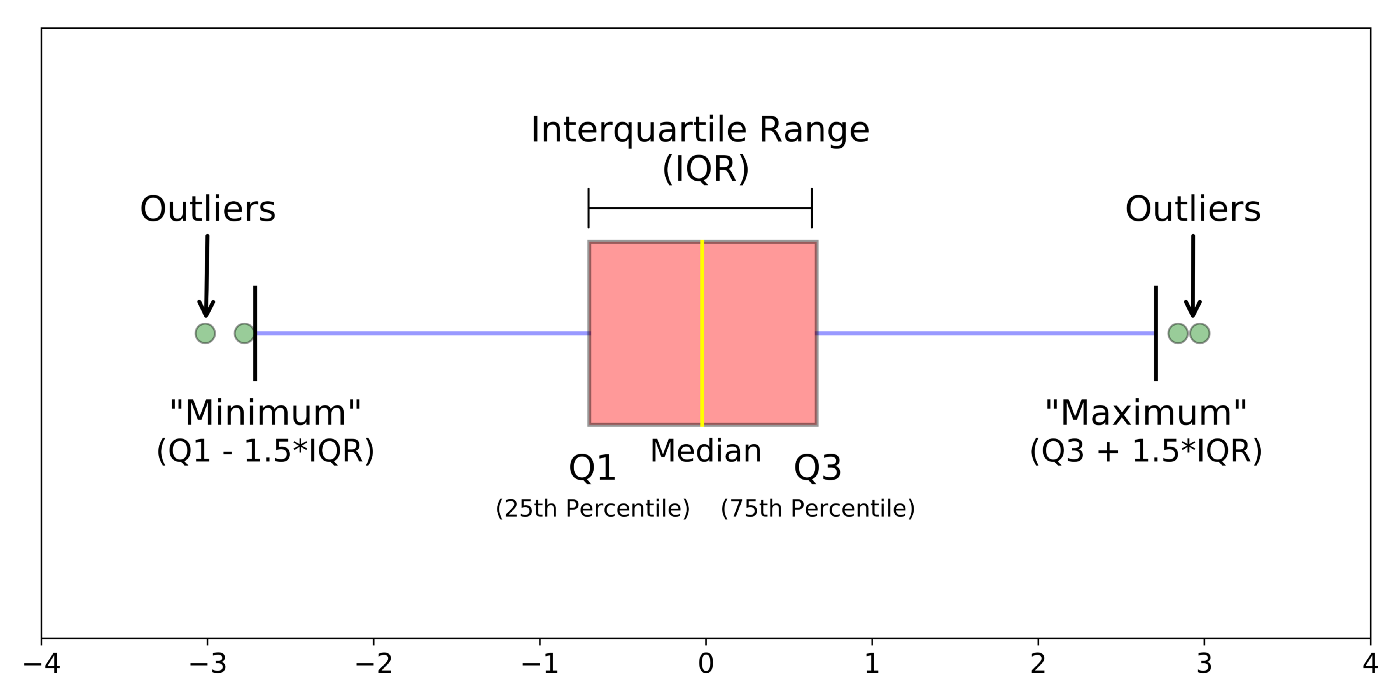

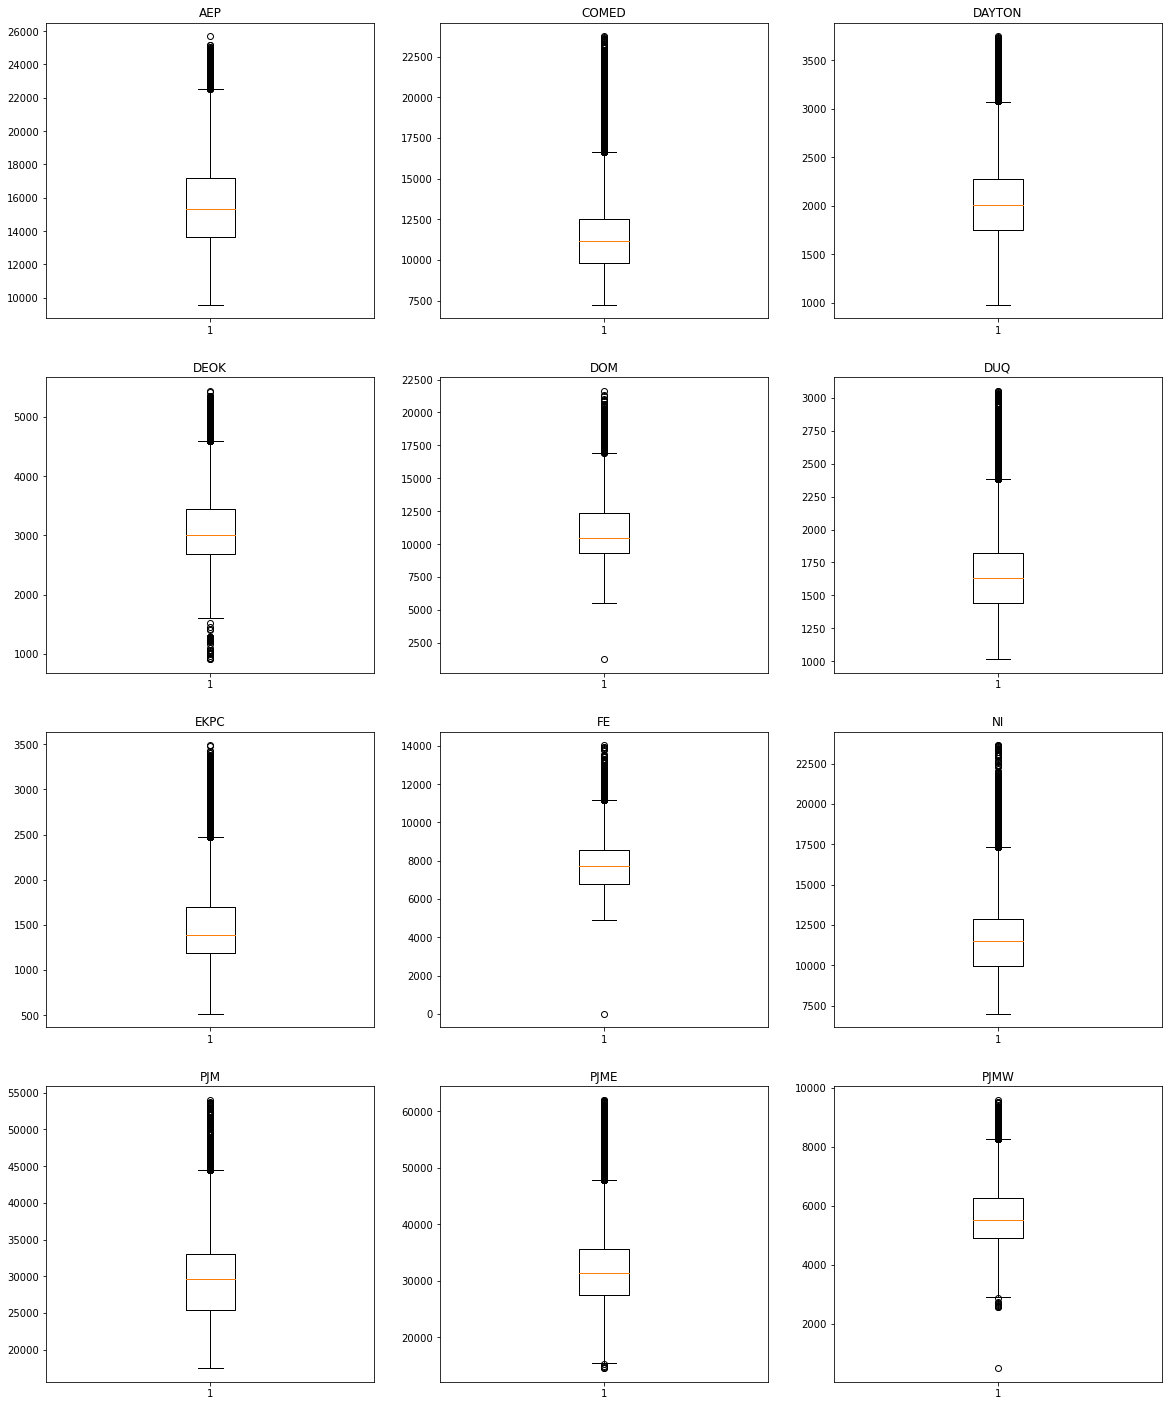

In [8]:
#We use boxplot to show the the megawatt energy consumption for respective electric company and observe the outliers
plt.figure(figsize=(20,25))
ax1 = plt.subplot(4, 3, 1);ax1.boxplot(aep['mw_energy_consumption']);ax1.title.set_text('AEP')
ax2 = plt.subplot(4, 3, 2);ax2.boxplot(comed['mw_energy_consumption']);ax2.title.set_text('COMED')
ax3 = plt.subplot(4, 3, 3);ax3.boxplot(dayton['mw_energy_consumption']);ax3.title.set_text('DAYTON')
ax4 = plt.subplot(4, 3, 4);ax4.boxplot(deok['mw_energy_consumption']);ax4.title.set_text('DEOK')
ax5 = plt.subplot(4, 3, 5);ax5.boxplot(dom['mw_energy_consumption']);ax5.title.set_text('DOM')
ax6 = plt.subplot(4, 3, 6);ax6.boxplot(duq['mw_energy_consumption']);ax6.title.set_text('DUQ')
ax7 = plt.subplot(4, 3, 7);ax7.boxplot(ekpc['mw_energy_consumption']);ax7.title.set_text('EKPC')
ax8 = plt.subplot(4, 3, 8);ax8.boxplot(fe['mw_energy_consumption']);ax8.title.set_text('FE')
ax9 = plt.subplot(4, 3, 9);ax9.boxplot(ni['mw_energy_consumption']);ax9.title.set_text('NI')
ax10 = plt.subplot(4, 3, 10);ax10.boxplot(pjm['mw_energy_consumption']);ax10.title.set_text('PJM')
ax11 = plt.subplot(4, 3, 11);ax11.boxplot(pjme['mw_energy_consumption']);ax11.title.set_text('PJME')
ax12 = plt.subplot(4, 3, 12);ax12.boxplot(pjmw['mw_energy_consumption']);ax12.title.set_text('PJMW')
plt.show()

Based on box plots in most of regions, outlier are visible, but since in almost all region the data records formed a continuse line we won't drop them ecxept in *PJMW* , *FE* and *DOM*  which one single record are far from main distribution of data.

In [69]:
#We remove outliers for these three electric companies
remov1_inx = dom["mw_energy_consumption"].idxmin();dom = dom.drop(remov1_inx)
remov2_inx = fe["mw_energy_consumption"].idxmin();fe = fe.drop(remov2_inx)
remov3_inx = pjmw["mw_energy_consumption"].idxmin();pjmw = pjmw.drop(remov3_inx)


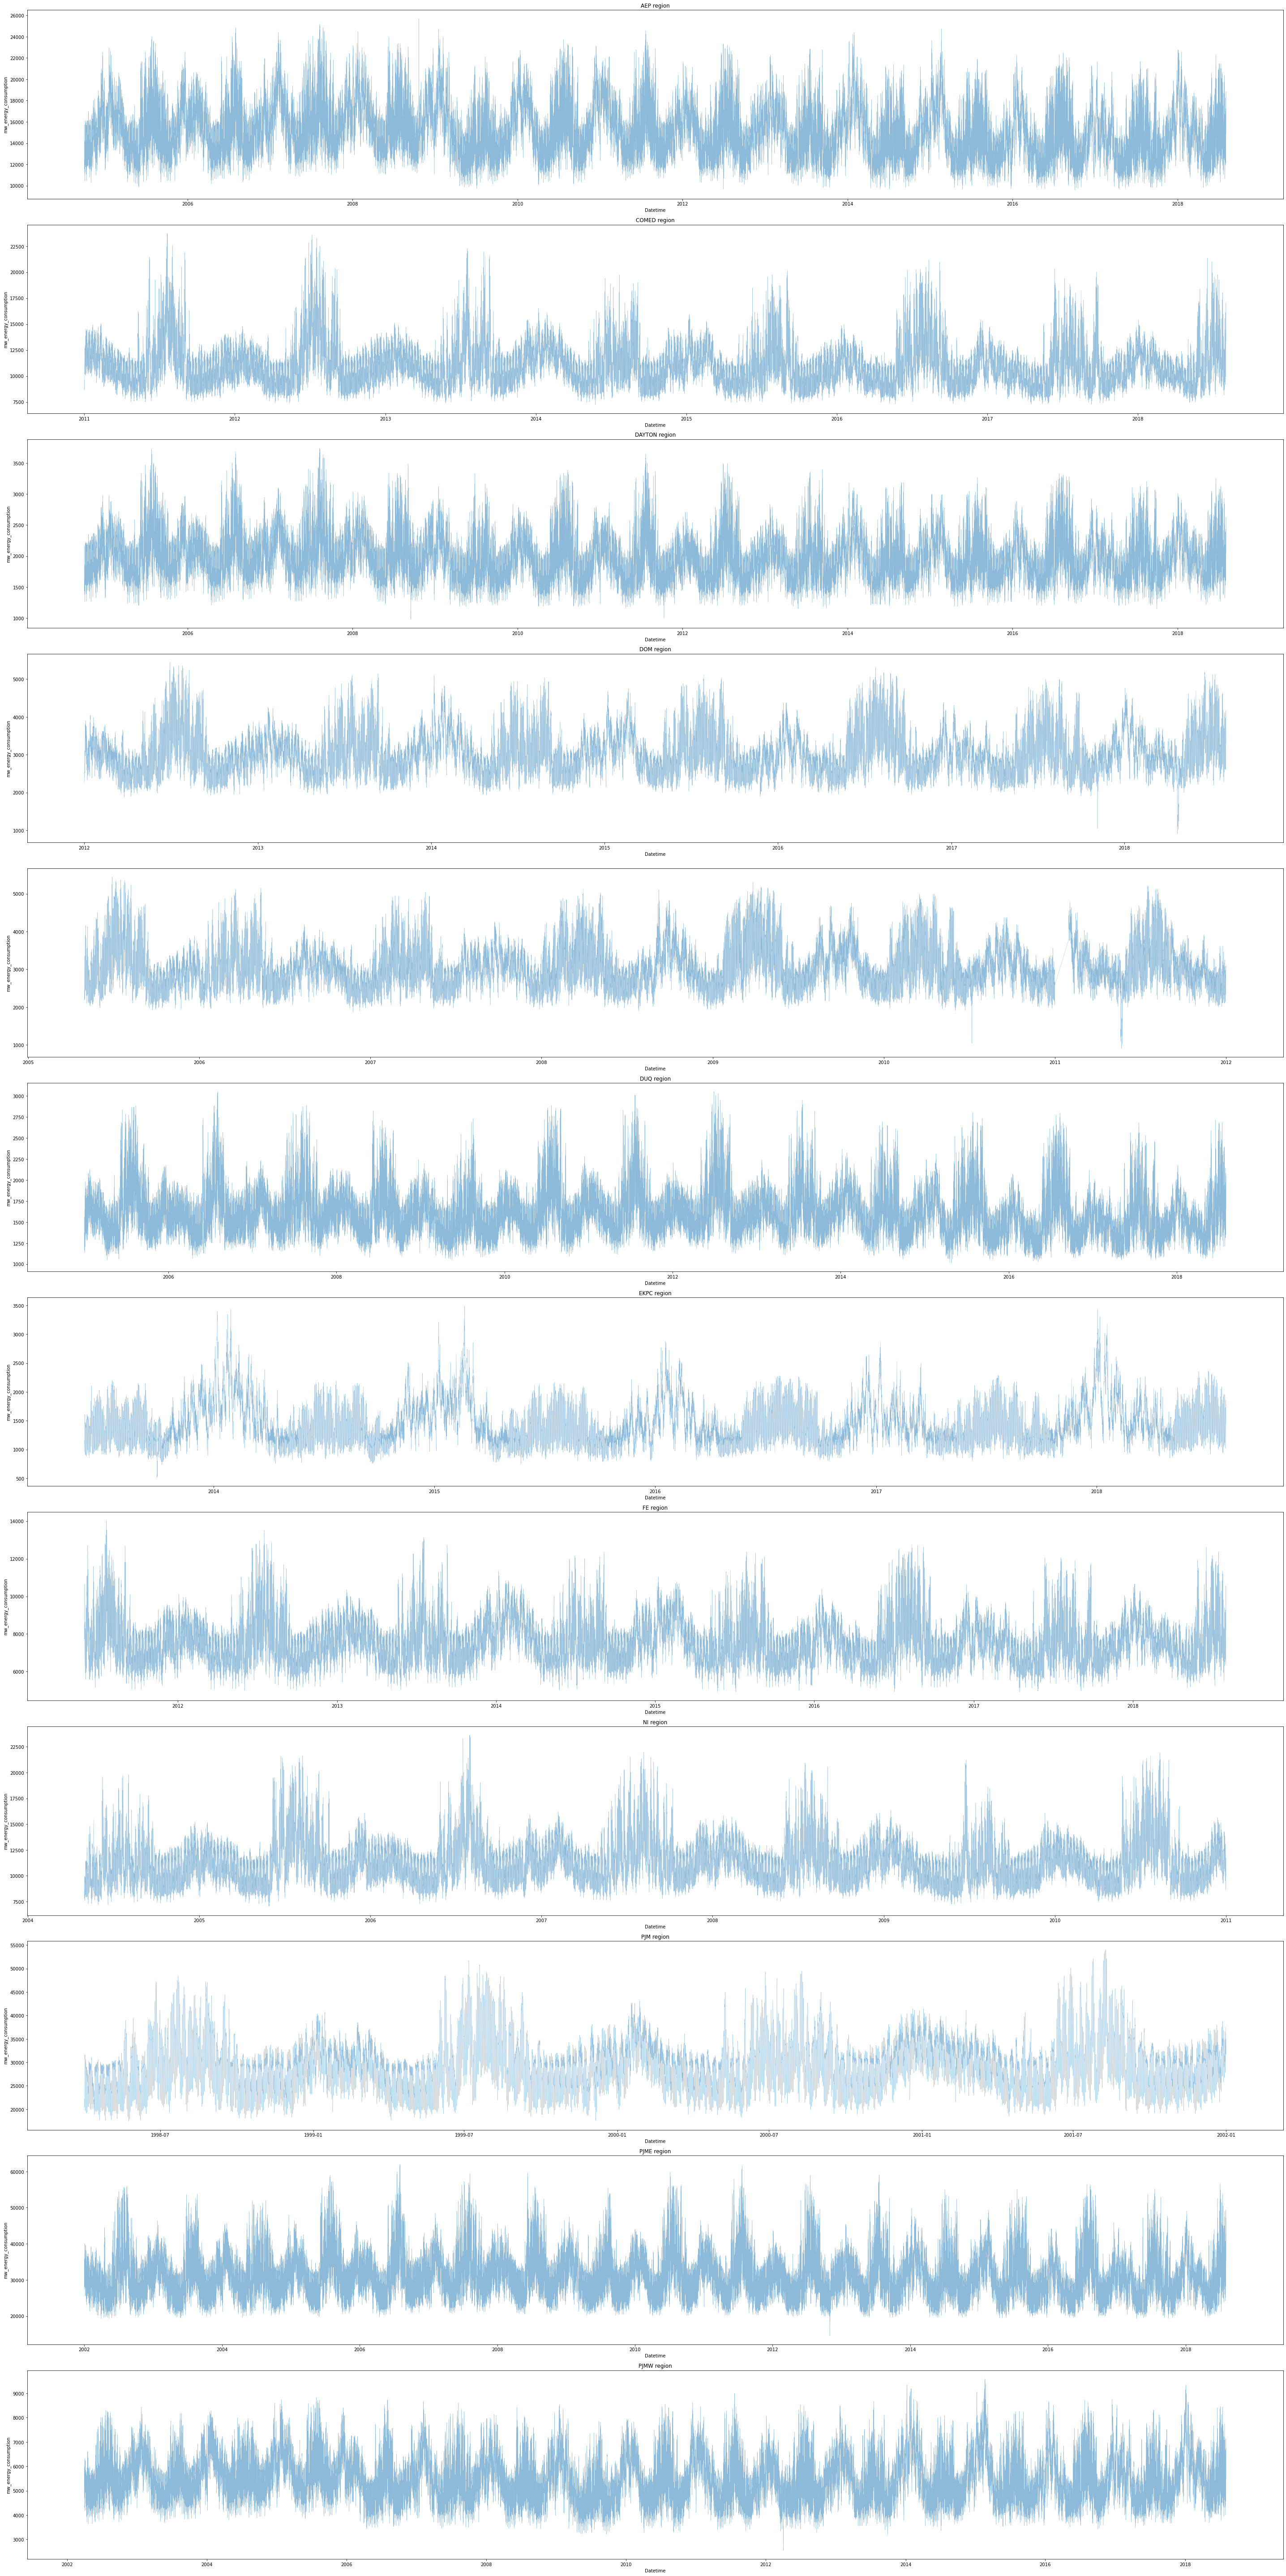

In [73]:
# We use line plots to show how much electricity was consumed on hourly in each region during their  certain dates
plt.figure(figsize=(40,80))
plt.subplot( 12, 1, 1)
ax1 = sns.lineplot(aep["Datetime"],aep["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax1.title.set_text('AEP region')
plt.subplot( 12, 1, 2)
ax2 = sns.lineplot(comed["Datetime"],comed["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax2.title.set_text('COMED region')
plt.subplot( 12, 1, 3)
ax3 = sns.lineplot(dayton["Datetime"],dayton["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax3.title.set_text('DAYTON region')
plt.subplot( 12, 1, 4)
ax4 = sns.lineplot(deok["Datetime"],deok["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax4.title.set_text('DEOK region')
plt.subplot( 12, 1, 5)
ax5 = sns.lineplot(dom["Datetime"],deok["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax4.title.set_text('DOM region')
plt.subplot( 12, 1, 6)
ax6 = sns.lineplot(duq["Datetime"],duq["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax6.title.set_text('DUQ region')
plt.subplot( 12, 1, 7)
ax7 = sns.lineplot(ekpc["Datetime"],ekpc["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax7.title.set_text('EKPC region')
plt.subplot( 12, 1, 8)
ax8 = sns.lineplot(fe["Datetime"],fe["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax8.title.set_text('FE region')
plt.subplot( 12, 1, 9)
ax9 = sns.lineplot(ni["Datetime"],ni["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax9.title.set_text('NI region')
plt.subplot( 12, 1, 10)
ax10 = sns.lineplot(pjm["Datetime"],pjm["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax10.title.set_text('PJM region')
plt.subplot( 12, 1, 11)
ax11 = sns.lineplot(pjme["Datetime"],pjme["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax11.title.set_text('PJME region')
plt.subplot( 12, 1, 12)
ax11 = sns.lineplot(pjmw["Datetime"],pjmw["mw_energy_consumption"],alpha = 0.5,linewidth=0.4);ax11.title.set_text('PJMW region')
plt.tight_layout() 

plt.show()

In [11]:
# We concatenate all the datasets together
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw])
df_raw = df_raw.reset_index().drop(['index'],axis= 1)
df_raw.sample(5) # check

Datetime  mw_energy_consumption electric_company
521202 2009-08-20 04:00:00                 1468.0              DUQ
784051 2000-12-30 07:00:00                29751.0              PJM
17002  2006-04-24 15:00:00                15600.0              AEP
483830 2005-11-25 15:00:00                 1674.0              DUQ
228726 2009-07-30 07:00:00                 1845.0           DAYTON

In [12]:
print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090124 entries, 0 to 1090123
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Datetime               1090124 non-null  datetime64[ns]
 1   mw_energy_consumption  1090124 non-null  float64       
 2   electric_company       1090124 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.0+ MB
None


In [13]:
# Next, we will describe the data. At the beginning of each step, we copy the dataset to make it easier to reload the data in case of problems in the project.
df1 = df_raw.copy()

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='electric_company'>

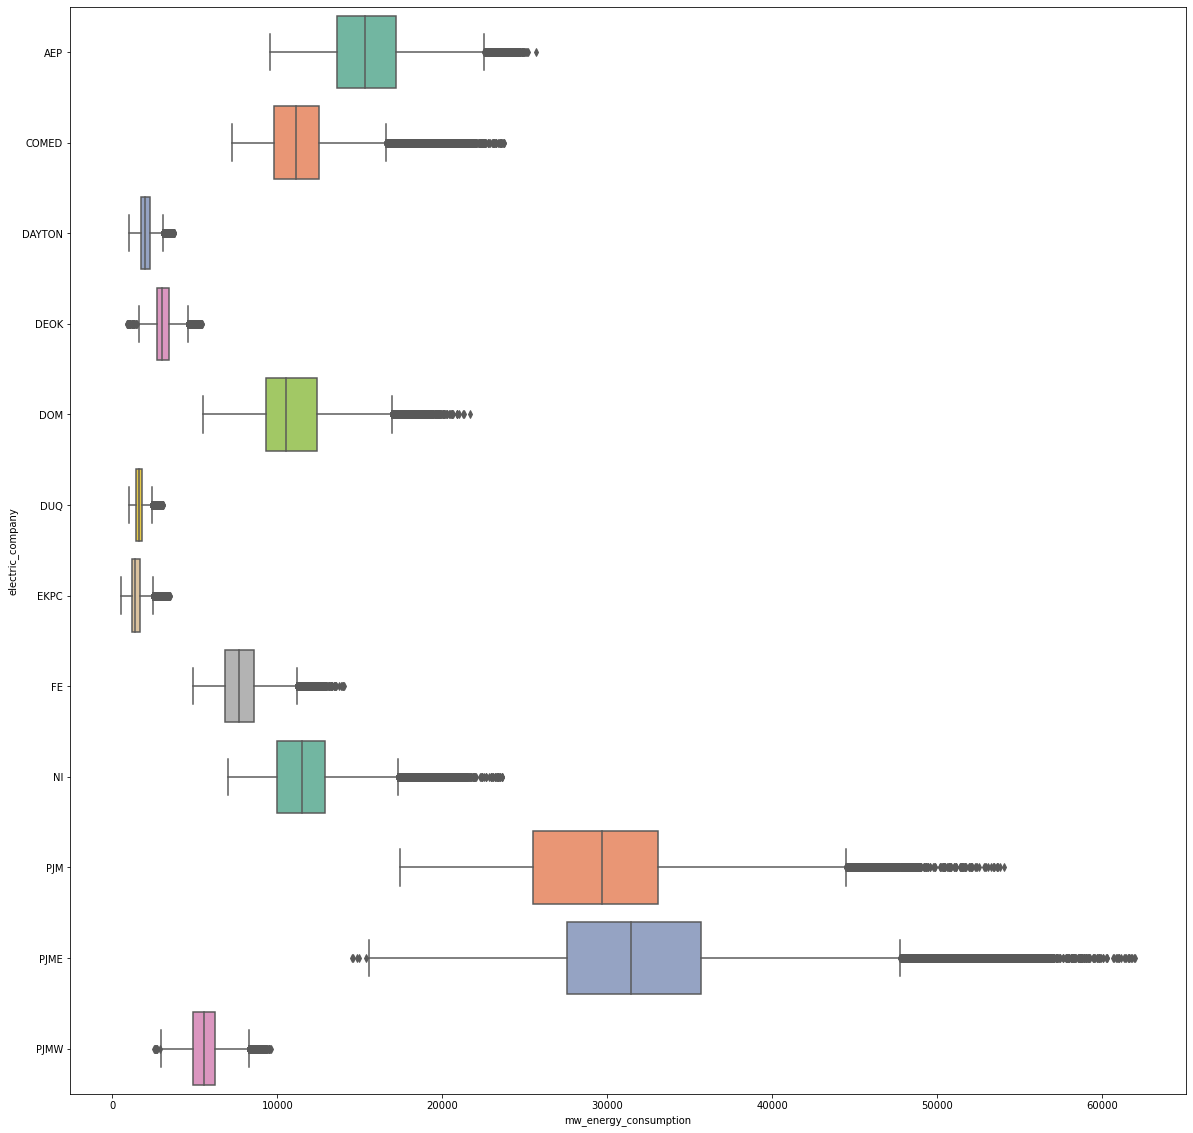

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot( y= 'electric_company', x='mw_energy_consumption' , data=df1 ,palette="Set2")

# DESCRIPTION OF DATA

### Check NA

In [15]:
df1.isna().sum()

Datetime                 0
mw_energy_consumption    0
electric_company         0
dtype: int64

In [16]:
# num_attributes = df1.select_dtypes( include=['float64'] )
# nNUM_attributes = df1.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

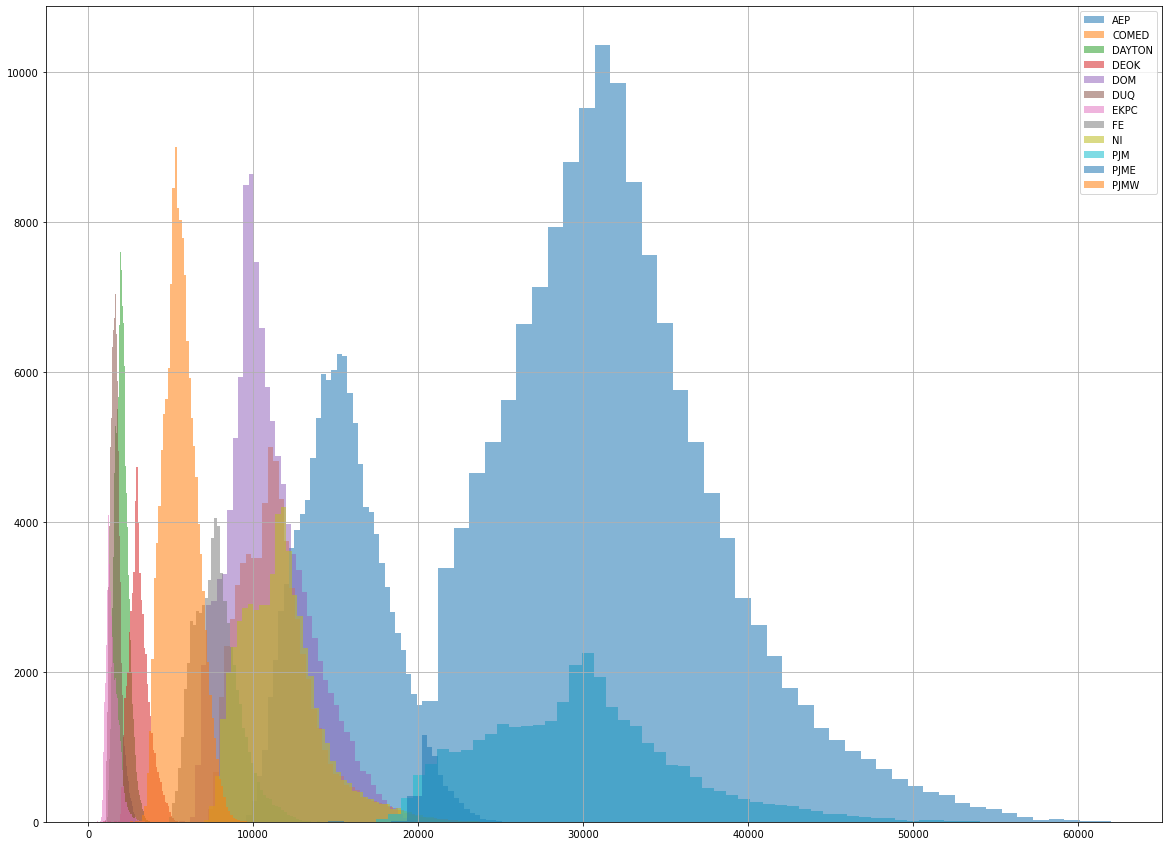

In [17]:
# We use histogram to show the megawatt energy consumption for respective company
lab = df1['electric_company'].unique()
df1.groupby(['electric_company'])['mw_energy_consumption'].hist(bins=50, figsize=(20,15),alpha = 0.55)
plt.legend(lab)
plt.show()

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

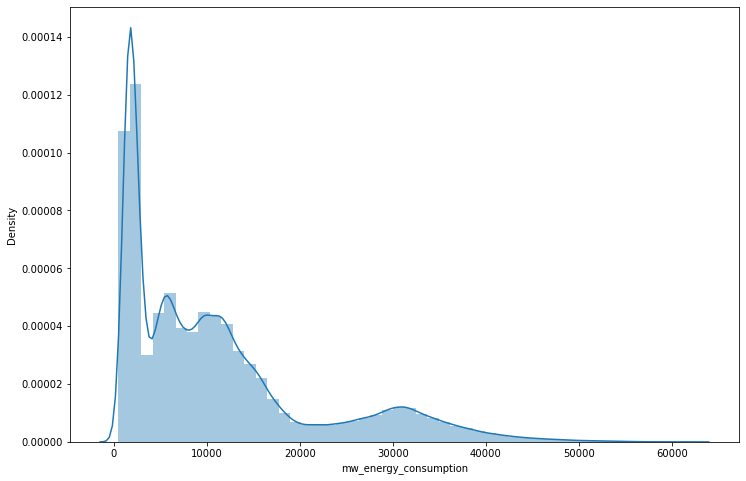

In [18]:
# We use histogram to show the megawatt energy consumption for all company
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot( df1['mw_energy_consumption'], hist=True )

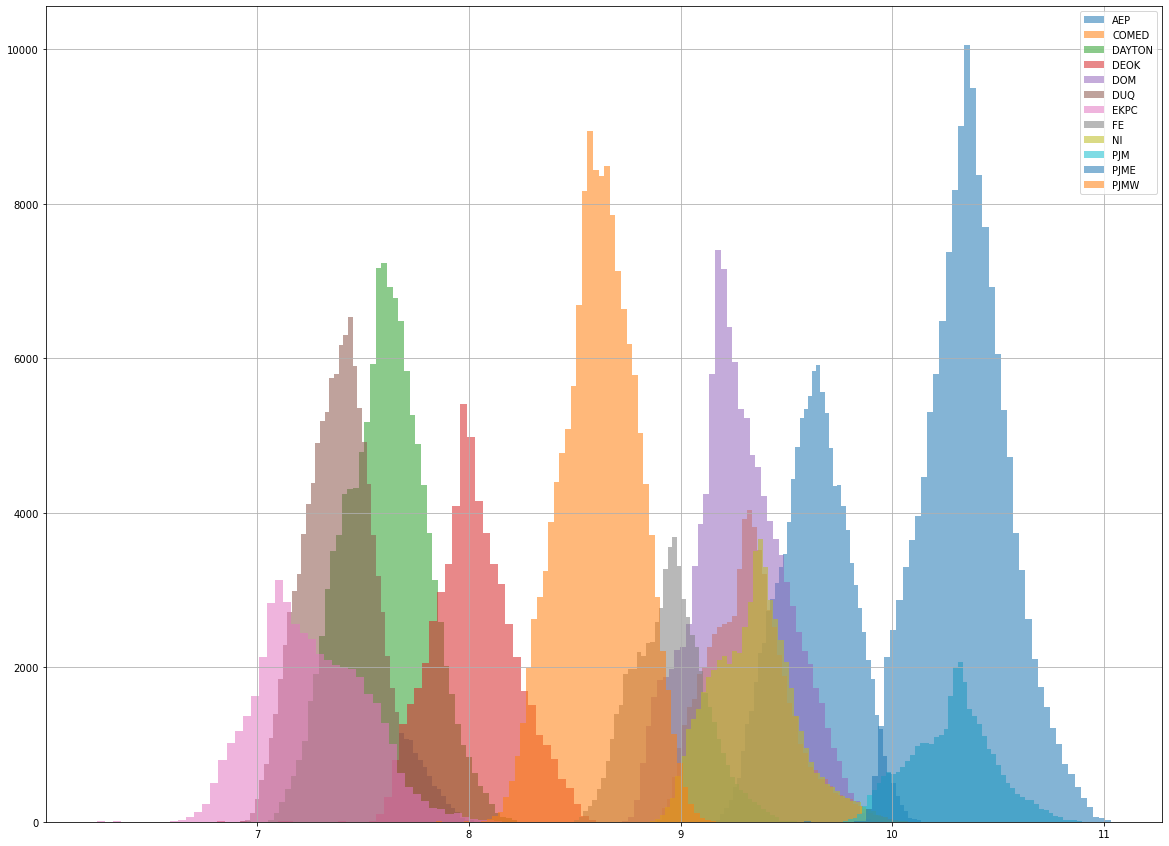

In [19]:
# We use histogram to show the log megawatt energy consumption for respective company
df_log = df1.copy()
df_log['mw_energy_consumption'] = df_log.groupby('electric_company')['mw_energy_consumption'].transform(lambda x: np.log(x))
df_log.groupby(['electric_company'])['mw_energy_consumption'].hist(bins=50, figsize=(20,15),alpha = 0.55)
plt.legend(lab)
plt.show()

# FEATURE ENGINEERING

#### We want to have a view of the evolution of energy consumption by looking only at the day of week,  month, year, day sessions, workdays and season as information.

In this function at the beginging, DateTime column change to date-time series.

So we define a function to generate these feature:

  dow(day of week):
 

     0 - Monday
     1 - Tuesday
     2 - Wednesday
     3 - Thursday
     4 - Friday
     5 - Saturday
     6 - Sunday 


##### 
Day session:

    0am to 6 am :Night
    6am to 12 pm: Morning
    12pm to 18pm : Afternoon 
    18pm to 24pm :Evening


Season:

    # - Winter -> December (12), January (01) and February (02);
    # - Spring -> March (03), April (04) and May (05);
    # - Summer -> Jun (06), July (07) and August (08);
    # - Autumn -> September (09), October (10) and November (11).

In [20]:

def data_prep(im_file):
         
    im_file.duplicated(subset='Datetime',keep=False).sum()
    im_file['Datetime']=pd.to_datetime(im_file['Datetime'])
  
    im_file['dow'] = im_file['Datetime'].dt.dayofweek
    im_file['month'] = im_file['Datetime'].dt.month
    im_file['year'] = im_file['Datetime'].dt.year
    im_file['Day_session']=pd.cut(im_file.Datetime.dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)
    im_file['Workdays']=pd.cut(im_file.Datetime.dt.dayofweek,
               [0,4,6],
               labels=['workday','weekend'],
               include_lowest=True)
    
    im_file['Season'] = im_file['Datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')
    return im_file

In [21]:
df2 = data_prep(df1)

In [22]:
df2_1 = df2.sort_values('Datetime',ascending=True).groupby('electric_company').head(len(df2))
df2_1

Datetime  mw_energy_consumption electric_company  dow  \
775239  1998-04-01 01:00:00                22259.0              PJM    2   
775240  1998-04-01 02:00:00                21244.0              PJM    2   
775241  1998-04-01 03:00:00                20651.0              PJM    2   
775242  1998-04-01 04:00:00                20421.0              PJM    2   
775243  1998-04-01 05:00:00                20713.0              PJM    2   
...                     ...                    ...              ...  ...   
361656  2018-08-03 00:00:00                 3281.0             DEOK    4   
642234  2018-08-03 00:00:00                 1448.0             EKPC    4   
116157  2018-08-03 00:00:00                14809.0              AEP    4   
941811  2018-08-03 00:00:00                35486.0             PJME    4   
1085012 2018-08-03 00:00:00                 5489.0             PJMW    4   

         month  year Day_session Workdays  Season  
775239       4  1998       Night  workday  Spring  
775240       4  1998       Night  workday  Spring  
775241       4  1998       Night  workday  Spring  
775242       4  1998       Night  workday  Spring  
775243       4  1998       Night  workday  Spring  
...        ...   ...         ...      ...     ...  
361656       8  2018       Night  workday  Summer  
642234       8  2018       Night  workday  Summer  
116157       8  2018       Night  workday  Summer  
941811       8  2018       Night  workday  Summer  
1085012      8  2018       Night  workday  Summer  

[1090124 rows x 9 columns]

In [23]:
df2_1 = df2_1.reset_index(drop=True)
df2_1

Datetime  mw_energy_consumption electric_company  dow  \
0       1998-04-01 01:00:00                22259.0              PJM    2   
1       1998-04-01 02:00:00                21244.0              PJM    2   
2       1998-04-01 03:00:00                20651.0              PJM    2   
3       1998-04-01 04:00:00                20421.0              PJM    2   
4       1998-04-01 05:00:00                20713.0              PJM    2   
...                     ...                    ...              ...  ...   
1090119 2018-08-03 00:00:00                 3281.0             DEOK    4   
1090120 2018-08-03 00:00:00                 1448.0             EKPC    4   
1090121 2018-08-03 00:00:00                14809.0              AEP    4   
1090122 2018-08-03 00:00:00                35486.0             PJME    4   
1090123 2018-08-03 00:00:00                 5489.0             PJMW    4   

         month  year Day_session Workdays  Season  
0            4  1998       Night  workday  Spring  
1            4  1998       Night  workday  Spring  
2            4  1998       Night  workday  Spring  
3            4  1998       Night  workday  Spring  
4            4  1998       Night  workday  Spring  
...        ...   ...         ...      ...     ...  
1090119      8  2018       Night  workday  Summer  
1090120      8  2018       Night  workday  Summer  
1090121      8  2018       Night  workday  Summer  
1090122      8  2018       Night  workday  Summer  
1090123      8  2018       Night  workday  Summer  

[1090124 rows x 9 columns]

In [24]:
# num_attributes2 = df2.select_dtypes( include=['int64', 'float64'] )
# nNUM_attributes2 = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )


In [25]:
df4 = df2_1.copy()

In [27]:
# df_plot = df4['electric_company'].drop_duplicates()
# df_plot= df_plot['Season'].drop_duplicates()
# df_plot= df_plot['Day_session'].drop_duplicates()
# df_plot= df_plot['Workdays'].drop_duplicates()


#com_num = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
#df4['electric_company'] = df4['electric_company'].map( com_num )
#wed_num= { 'weekend': 1, 'workday': 2}
#df4['Workdays']= df4['Workdays'].map( wed_num )
#se_num= { 'Spring': 1, 'Summer': 2,'Autumn': 3,'Winter': 4}
#df4['Season']= df4['Season'].map( se_num )

In [74]:
# df4['electric_company'].drop_duplicates()

In [75]:
# df4['Season'].drop_duplicates()

In [76]:
# df4['Day_session'].drop_duplicates()

In [77]:
# df4['Workdays'].drop_duplicates()

#### In below cell, data after preprocessing are visualized based on the genrated features, and counts(and density).

<AxesSubplot:xlabel='mw_energy_consumption', ylabel='Density'>

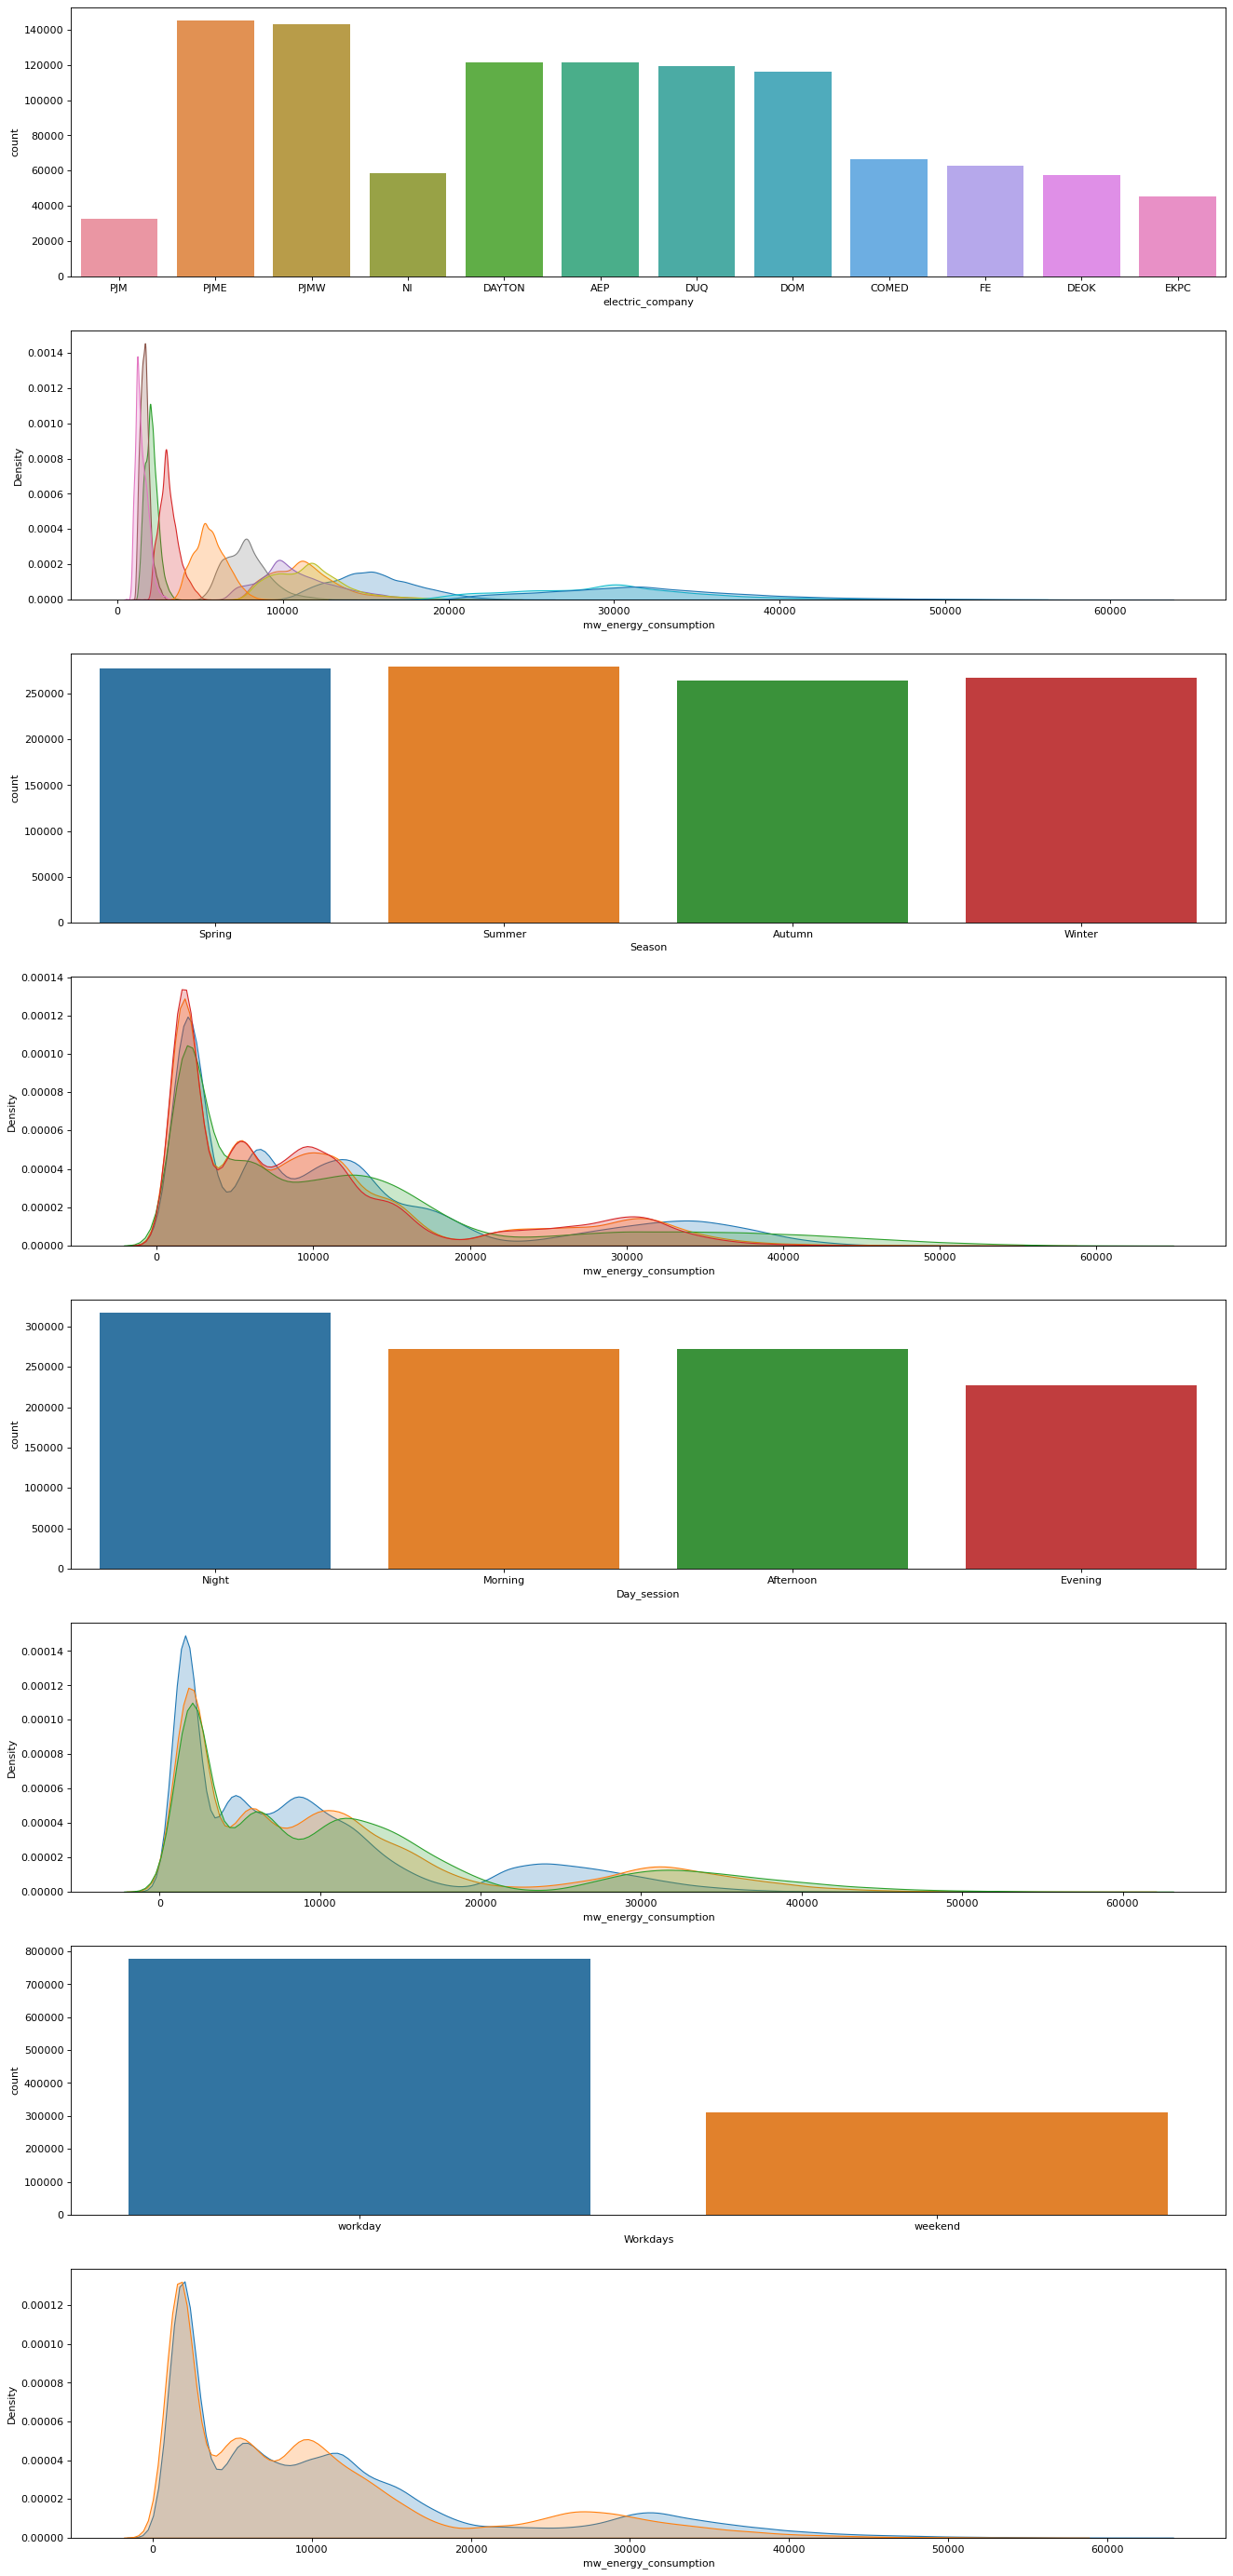

In [32]:
plt.figure(figsize=(20, 45), dpi=80)

# electric_company
plt.subplot( 8, 1, 1)
sns.countplot( df4['electric_company'] )

plt.subplot( 8, 1, 2)
sns.kdeplot( df4[df4['electric_company'] == 'AEP']['mw_energy_consumption'], label='AEP', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'COMED']['mw_energy_consumption'], label='COMED', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DAYTON']['mw_energy_consumption'], label='DAYTON', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DEOK']['mw_energy_consumption'], label='DEOK', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DOM']['mw_energy_consumption'], label='DOM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DUQ']['mw_energy_consumption'], label='DUQ', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'EKPC']['mw_energy_consumption'], label='EKPC', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'FE']['mw_energy_consumption'], label='FE', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'NI']['mw_energy_consumption'], label='NI', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJM']['mw_energy_consumption'], label='PJM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJME']['mw_energy_consumption'], label='PJME', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJMW']['mw_energy_consumption'], label='PJMW', shade=True )

# # season
plt.subplot( 8, 1, 3)
sns.countplot( df4['Season'] )

plt.subplot( 8, 1, 4)
sns.kdeplot( df4[df4['Season'] == 'Winter']['mw_energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Autumn']['mw_energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Summer']['mw_energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df4[df4['Season'] == 'Spring']['mw_energy_consumption'], label='Spring', shade=True )

# # Day session
plt.subplot( 8, 1, 5)
sns.countplot( df4['Day_session'] )

plt.subplot( 8, 1, 6)
sns.kdeplot( df4[df4['Day_session'] == 'Night']['mw_energy_consumption'], label='Night', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Morning']['mw_energy_consumption'], label='Morning', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Noon']['mw_energy_consumption'], label='Noon', shade=True )
sns.kdeplot( df4[df4['Day_session'] == 'Evening']['mw_energy_consumption'], label='Evening', shade=True )

# # # workdays
plt.subplot( 8, 1, 7)
sns.countplot( df4['Workdays'] )

plt.subplot( 8, 1, 8)
sns.kdeplot( df4[df4['Workdays'] == 'workday']['mw_energy_consumption'], label='workday', shade=True )
sns.kdeplot( df4[df4['Workdays'] == 'weekend']['mw_energy_consumption'], label='weekend', shade=True )




#### In this cell, since we use  categorical variable we assign a number to them in order to plot them.

In [33]:

com_num = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
df4['electric_company'] = df4['electric_company'].map( com_num )
wed_num= { 'weekend': 1, 'workday': 2}
df4['Workdays']= df4['Workdays'].map( wed_num )
se_num= { 'Spring': 1, 'Summer': 2,'Autumn': 3,'Winter': 4}
df4['Season']= df4['Season'].map( se_num )


### Which region spend more energy
In region 'PJM': 10 and 'PJME': 11 consumed much more energy than others.
Regplot tries to plot the data and a linear regression model fit.

<AxesSubplot:>

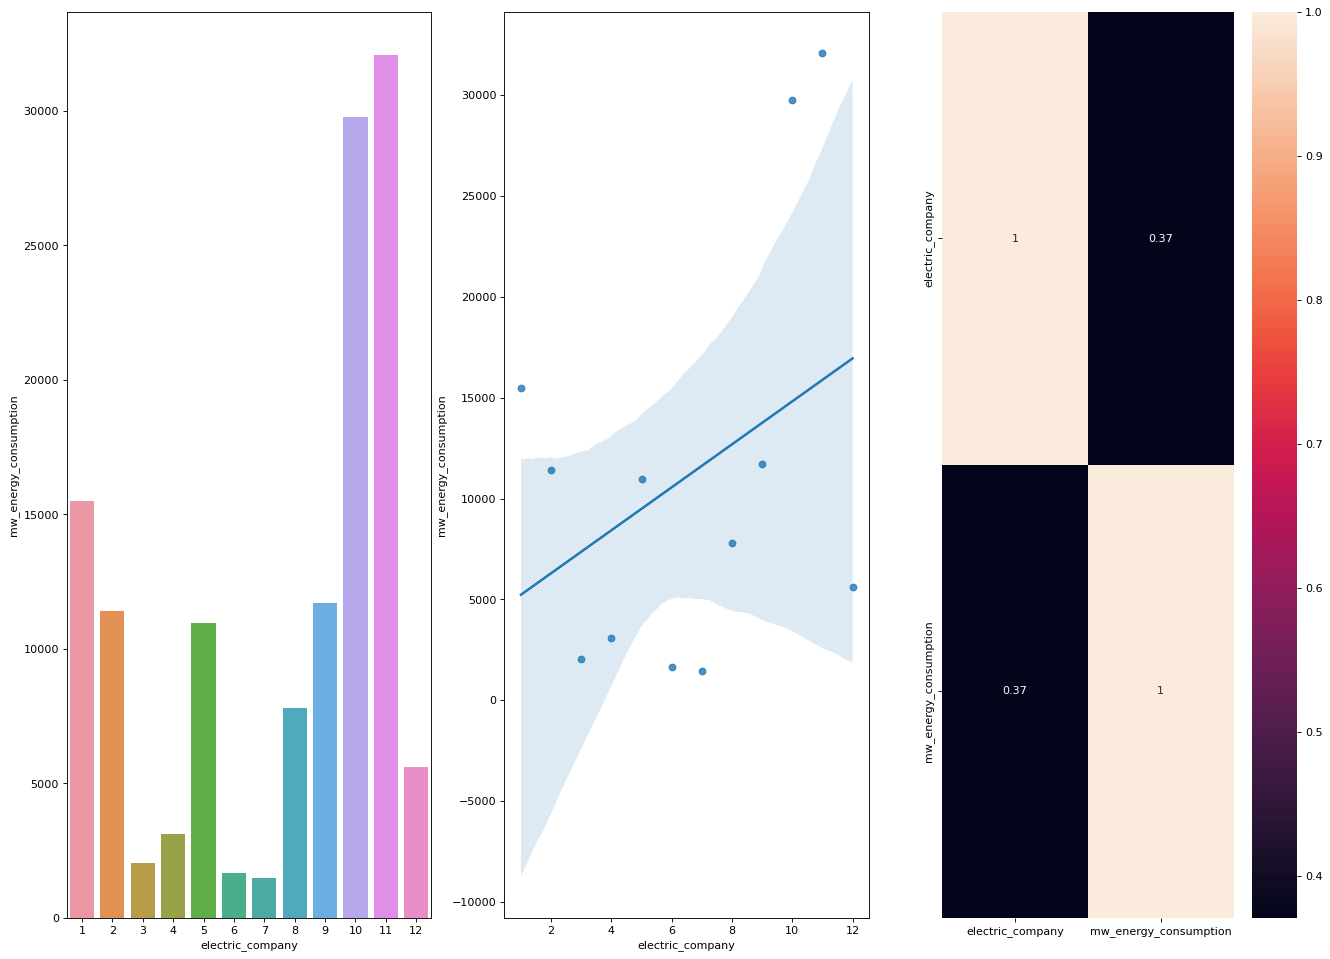

In [34]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['electric_company', 'mw_energy_consumption']].groupby( 'electric_company' ).mean().reset_index()

sns.barplot( x='electric_company', y='mw_energy_consumption', data=aux1)

plt.subplot(1,3,2)
aux2 = df4[['electric_company', 'mw_energy_consumption']].groupby( 'electric_company' ).mean().reset_index()
sns.regplot( x='electric_company', y='mw_energy_consumption', data=aux2 )
plt.subplot(1,3,3)
aux3 = df4[['electric_company', 'mw_energy_consumption']].groupby( 'electric_company' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )

### Yearly consume energy
From 1997 to 2018, more electricity was used in the first 4 years, and then gradually decreased

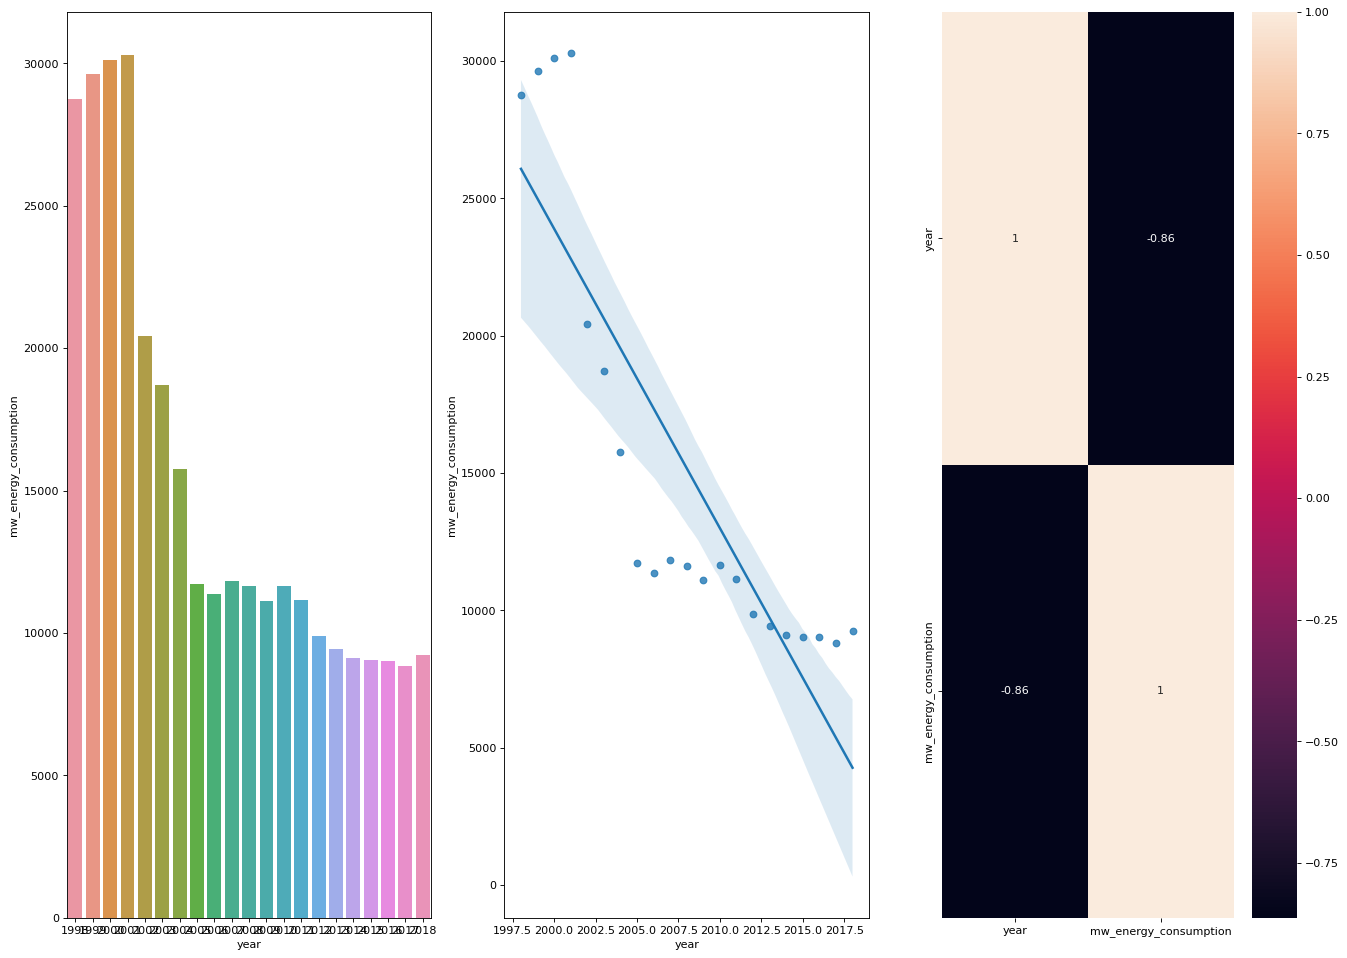

In [35]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()

sns.barplot( x='year', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()
sns.regplot( x='year', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['year', 'mw_energy_consumption']].groupby( 'year' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True );

### Higher or lower temperature seasons consume more energy

TRUE When we see the sum of all energy consumption, we see that winter and summer are the most intense seasons, recording the highest energy consumption. At the same time, when we have dispersed over the years, we observe the same behavior, with few exceptions.

<AxesSubplot:>

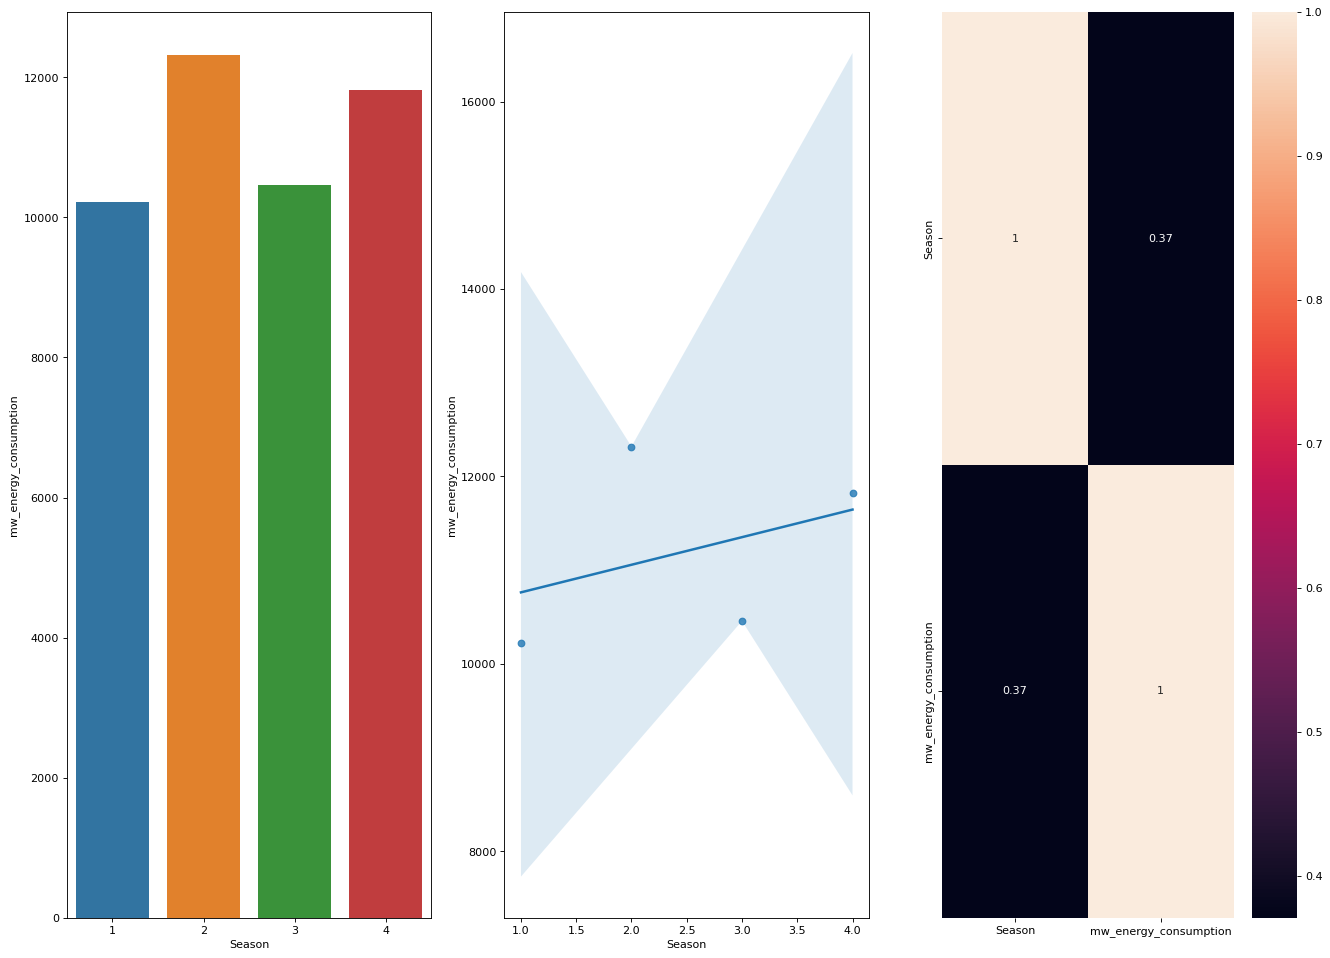

In [36]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.barplot( x='Season', y='mw_energy_consumption', data=aux1)
# part of day should be number not str

plt.subplot(1,3,2)
aux2 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.regplot( x='Season', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['Season', 'mw_energy_consumption']].groupby( 'Season' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )



### Consume more energy during weekends

FALSE Less energy is consumed during the weekend.

<AxesSubplot:>

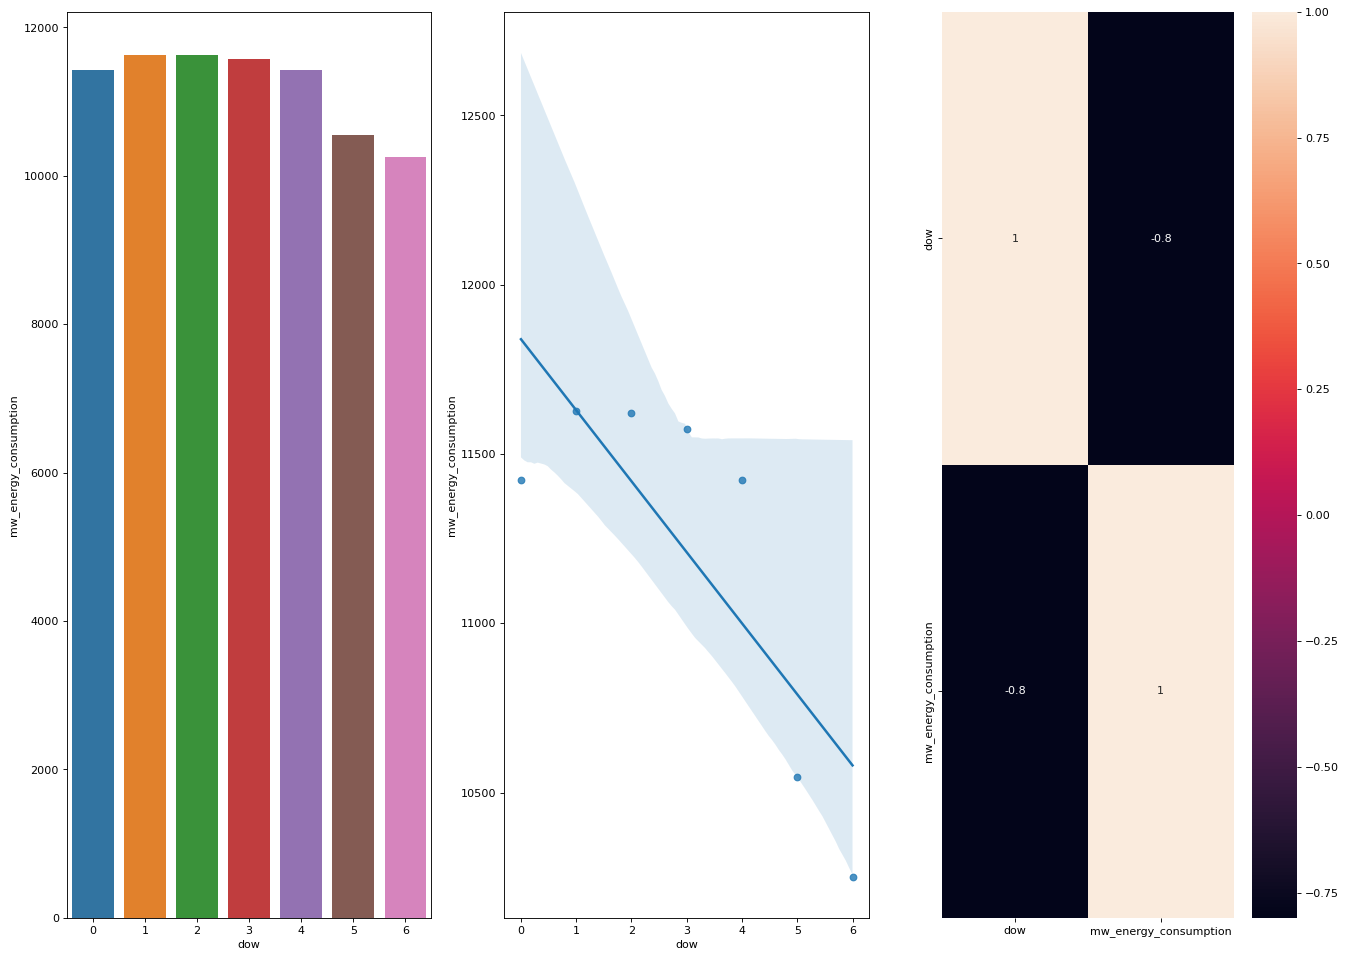

In [37]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()

sns.barplot( x='dow', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()
sns.regplot( x='dow', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )

### Workday consume more energy

TRUE workdays consume more energy than weekends

<AxesSubplot:>

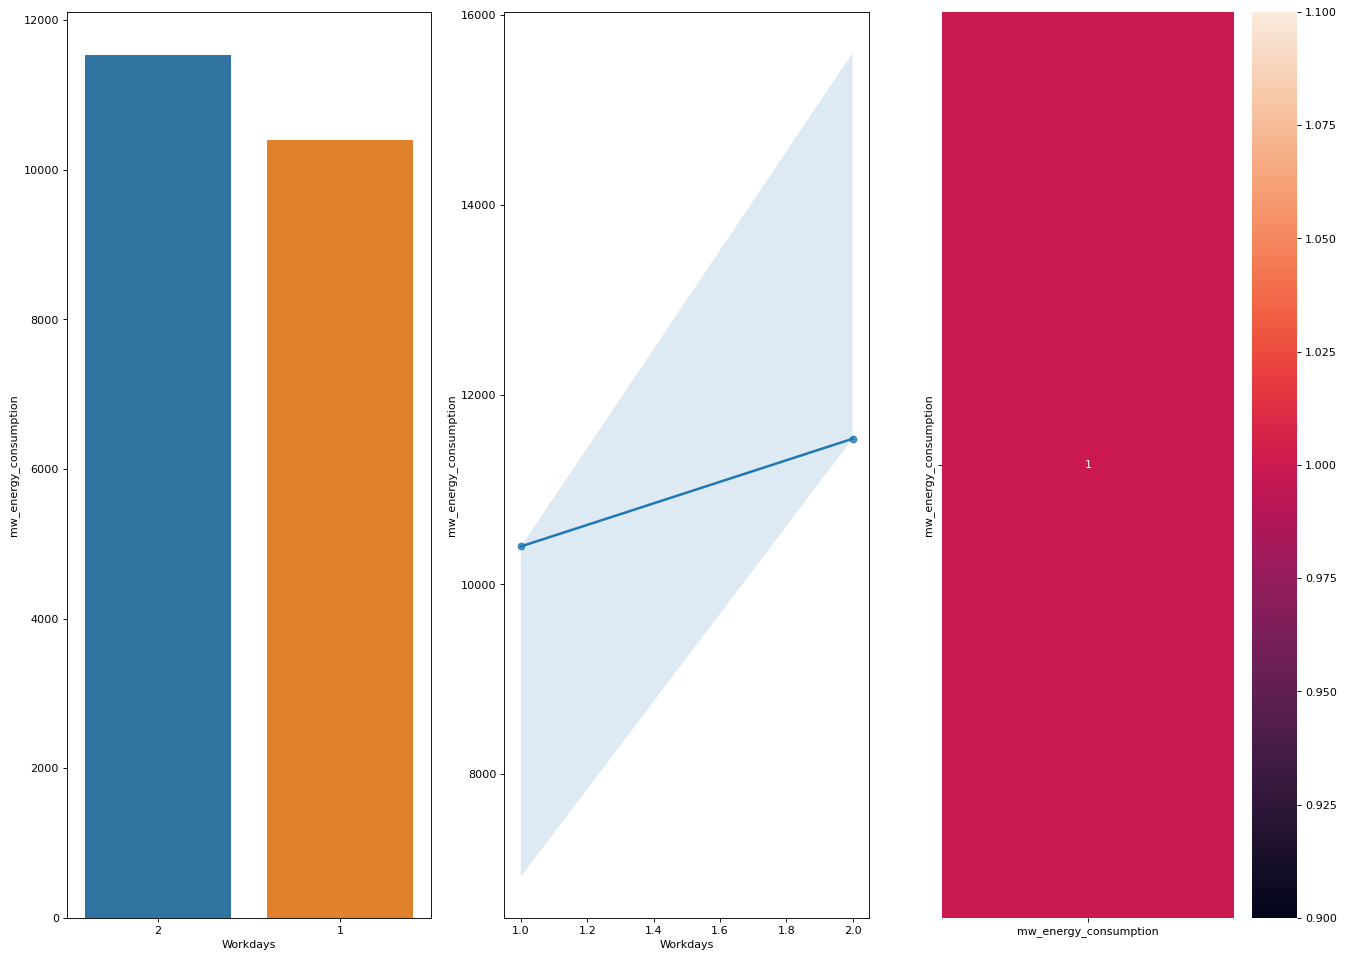

In [38]:
plt.figure(figsize=(20, 15), dpi=80)
plt.subplot(1,3,1)
aux1 = df4[['Workdays', 'mw_energy_consumption']].groupby( 'Workdays' ).mean().reset_index()

sns.barplot( x='Workdays', y='mw_energy_consumption', data=aux1)
# part of day should be number not str


plt.subplot(1,3,2)
aux2 = df4[['Workdays', 'mw_energy_consumption']].groupby( 'Workdays' ).mean().reset_index()
sns.regplot( x='Workdays', y='mw_energy_consumption', data=aux2 )

plt.subplot(1,3,3)
aux3 = df4[['Workdays', 'mw_energy_consumption']].groupby( 'Workdays' ).mean().reset_index()
sns.heatmap( aux3.corr( method='pearson' ), annot=True )

In [39]:
#plt.figure(figsize=(10,10))
#aux1 = df4[['dow', 'mw_energy_consumption']].groupby( 'dow' ).sum().reset_index()
#plt.subplot( 2, 1, 1 )
#sns.barplot( x='dow', y='mw_energy_consumption', data=aux1 )

#aux2 = df4[['year', 'dow', 'mw_energy_consumption']].groupby( ['year', 'dow'] ).sum().reset_index()
#plt.subplot( 2, 1, 2 )
#sns.barplot( x='year', y='mw_energy_consumption', hue='dow', data=aux2 )

<AxesSubplot:>

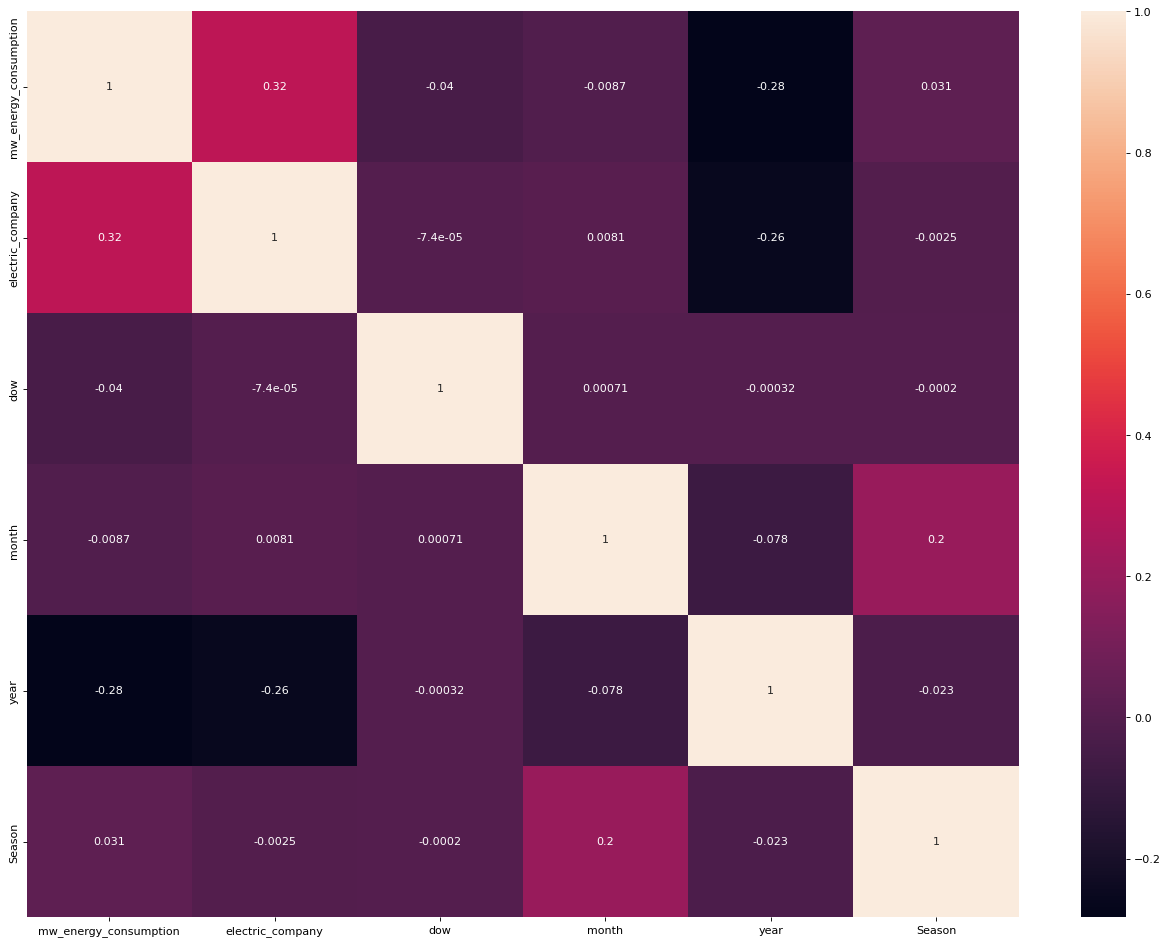

In [79]:
correlation = df4.corr( method='pearson' )
plt.figure(figsize=(20, 15), dpi=80)
sns.heatmap( correlation, annot=True )

In [82]:
df6=df2_1.copy()


In [83]:
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier(random_state=0)
# forest.fit(X_train, y_train)

# features = ["dow", "electric_company", "month", "year", "Workdays", "Season"]

# # Get feature importances from our random forest model
# importances = reg.feature_importances_

# # Get the index of importances from greatest importance to least
# sorted_index = np.argsort(importances)[::-1]
# sorted_index_top = sorted_index[:10]
# x = range(len(sorted_index_top))

# # Create tick labels 
# labels = np.array(features)[sorted_index_top]
# plt.bar(x, importances[sorted_index_top], tick_label=labels)
# plt.title("Feature importance analyisis")
# # Rotate tick labels to vertical
# plt.xticks(rotation=45)
# plt.show()

In [84]:
df6

Datetime  mw_energy_consumption electric_company  dow  \
0       1998-04-01 01:00:00                22259.0              PJM    2   
1       1998-04-01 02:00:00                21244.0              PJM    2   
2       1998-04-01 03:00:00                20651.0              PJM    2   
3       1998-04-01 04:00:00                20421.0              PJM    2   
4       1998-04-01 05:00:00                20713.0              PJM    2   
...                     ...                    ...              ...  ...   
1090119 2018-08-03 00:00:00                 3281.0             DEOK    4   
1090120 2018-08-03 00:00:00                 1448.0             EKPC    4   
1090121 2018-08-03 00:00:00                14809.0              AEP    4   
1090122 2018-08-03 00:00:00                35486.0             PJME    4   
1090123 2018-08-03 00:00:00                 5489.0             PJMW    4   

         month  year Day_session Workdays  Season  
0            4  1998       Night  workday  Spring  
1            4  1998       Night  workday  Spring  
2            4  1998       Night  workday  Spring  
3            4  1998       Night  workday  Spring  
4            4  1998       Night  workday  Spring  
...        ...   ...         ...      ...     ...  
1090119      8  2018       Night  workday  Summer  
1090120      8  2018       Night  workday  Summer  
1090121      8  2018       Night  workday  Summer  
1090122      8  2018       Night  workday  Summer  
1090123      8  2018       Night  workday  Summer  

[1090124 rows x 9 columns]

# DATA PREPARATION & FEATURE SELECTION

### Splitting, scaling and encoding the data frame

In [85]:
# Split dataframe into training and test dataset
def split_and_scaling(df,fraction=0.8):
    X_train, X_test = pd.DataFrame([]), pd.DataFrame([])
    col_to_scaling=['mw_energy_consumption']
    scaler=MinMaxScaler() # converting the value of the range to 0 to 1
    df[col_to_scaling]= scaler.fit_transform(df[col_to_scaling])

    for name in df['electric_company'].unique():
        #coo_name=df[df['electric_company'] == name]
        co_name= df.loc[df['electric_company']== name]
        a=int(len(co_name)*fraction)
        train=co_name.iloc[:a]
        test= co_name.iloc[a:]
        
        X_train = X_train.append(train)
        X_test = X_test.append(test)

    return X_train,X_test



Since the values in the variable "Day_session","Season","dow" have no important relationship between them, and our final dataset will not have many columns, we will use the "one hot encoding" method.

In [86]:
def dummies_split(df,region_name,fraction=.05):
        X_train,X_test= split_and_scaling(df,fraction)
        X_train1= pd.get_dummies(data=X_train,columns=['Day_session','Season','dow']).loc[X_train['electric_company']==region_name]

        X_train1=X_train1.drop(['year','Datetime','month','Workdays'],axis='columns')
        X_train2=X_train1.drop(['mw_energy_consumption'],axis='columns')
        y_train1=X_train['mw_energy_consumption'].loc[X_train['electric_company']==region_name]
        y_train2=pd.DataFrame(y_train1)


        X_test1= pd.get_dummies(data=X_test,columns=['Day_session','Season','dow']).loc[X_test['electric_company']==region_name]

        X_test1=X_test1.drop(['year','Datetime','month','Workdays'],axis='columns')
        X_test2=X_test1.drop(['mw_energy_consumption'],axis='columns')
        y_test1=X_test['mw_energy_consumption'].loc[X_test['electric_company']==region_name]
        y_test2=pd.DataFrame(y_test1)


        return X_train2,X_test2,y_train2,y_test2

In [87]:
X_train,X_test,y_train,y_test=dummies_split(df6,'AEP',fraction=0.8)

X_train

electric_company  Day_session_Night  Day_session_Morning  \
82593               AEP                  1                    0   
82596               AEP                  1                    0   
82602               AEP                  1                    0   
82607               AEP                  1                    0   
82612               AEP                  1                    0   
...                 ...                ...                  ...   
847536              AEP                  1                    0   
847553              AEP                  1                    0   
847563              AEP                  1                    0   
847570              AEP                  1                    0   
847576              AEP                  0                    1   

        Day_session_Afternoon  Day_session_Evening  Season_Autumn  \
82593                       0                    0              1   
82596                       0                    0              1   
82602                       0                    0              1   
82607                       0                    0              1   
82612                       0                    0              1   
...                       ...                  ...            ...   
847536                      0                    0              1   
847553                      0                    0              1   
847563                      0                    0              1   
847570                      0                    0              1   
847576                      0                    0              1   

        Season_Spring  Season_Summer  Season_Winter  dow_0  dow_1  dow_2  \
82593               0              0              0      0      0      0   
82596               0              0              0      0      0      0   
82602               0              0              0      0      0      0   
82607               0              0              0      0      0      0   
82612               0              0              0      0      0      0   
...               ...            ...            ...    ...    ...    ...   
847536              0              0              0      0      1      0   
847553              0              0              0      0      1      0   
847563              0              0              0      0      1      0   
847570              0              0              0      0      1      0   
847576              0              0              0      0      1      0   

        dow_3  dow_4  dow_5  dow_6  
82593       0      1      0      0  
82596       0      1      0      0  
82602       0      1      0      0  
82607       0      1      0      0  
82612       0      1      0      0  
...       ...    ...    ...    ...  
847536      0      0      0      0  
847553      0      0      0      0  
847563      0      0      0      0  
847570      0      0      0      0  
847576      0      0      0      0  

[97015 rows x 16 columns]

## MACHINE LEARNING MODELLING --- ANN ML

In [88]:
from sklearn.neural_network import MLPRegressor

## ML for AEP electric company


In [89]:
aep_X_train,aep_X_test,aep_y_train,aep_y_test=dummies_split(df6,'NI',fraction=0.8)

aep_X_train=aep_X_train.drop(['electric_company'],axis='columns')
aep_X_test=aep_X_test.drop(['electric_company'],axis='columns')



In [90]:
aep_y_train

mw_energy_consumption
71573                0.141215
71576                0.131003
71581                0.124709
71582                0.120384
71587                0.118936
...                       ...
376877               0.185235
376885               0.186828
376897               0.186389
376902               0.184698
376908               0.182616

[46760 rows x 1 columns]

In [100]:
regr_aep = MLPRegressor(hidden_layer_sizes = 3,random_state = 1234, activation='tanh',solver='adam',alpha= 0.01,
                        max_iter=1000,learning_rate= 'adaptive').fit(aep_X_train, aep_y_train)
regr_aep

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=3,
             learning_rate='adaptive', max_iter=1000, random_state=1234)

In [101]:
# hidden_layer_sizes=(100), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]

In [102]:
regr_aep.score(aep_X_train,aep_y_train)


0.5419655264316074

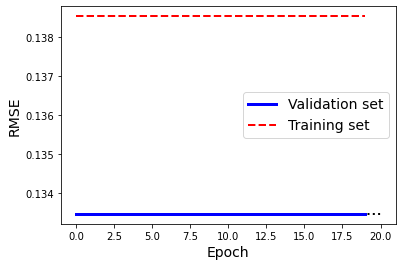

In [104]:
regr = MLPRegressor(hidden_layer_sizes = 3,random_state = 1234, activation='tanh',solver='adam',alpha= 0.01,
                        learning_rate= 'adaptive')    
                                               

n_epochs = 20
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    regr.fit(aep_X_train, aep_y_train)
    y_train_predict = regr.predict(aep_X_train)
    y_val_predict = regr.predict(aep_X_test)
    train_errors.append(mean_absolute_error(aep_y_train, y_train_predict))
    val_errors.append(mean_absolute_error(aep_y_test, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# plt.annotate('Best model',
#              xy=(best_epoch, best_val_rmse),
#              xytext=(best_epoch, best_val_rmse + 1),
#              ha="center",
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=16,
            # )

# best_val_rmse -= best_epoch  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")

plt.show()

In [105]:
y_train_predict = regr.predict(aep_X_train)
y_val_predict = regr.predict(aep_X_test)

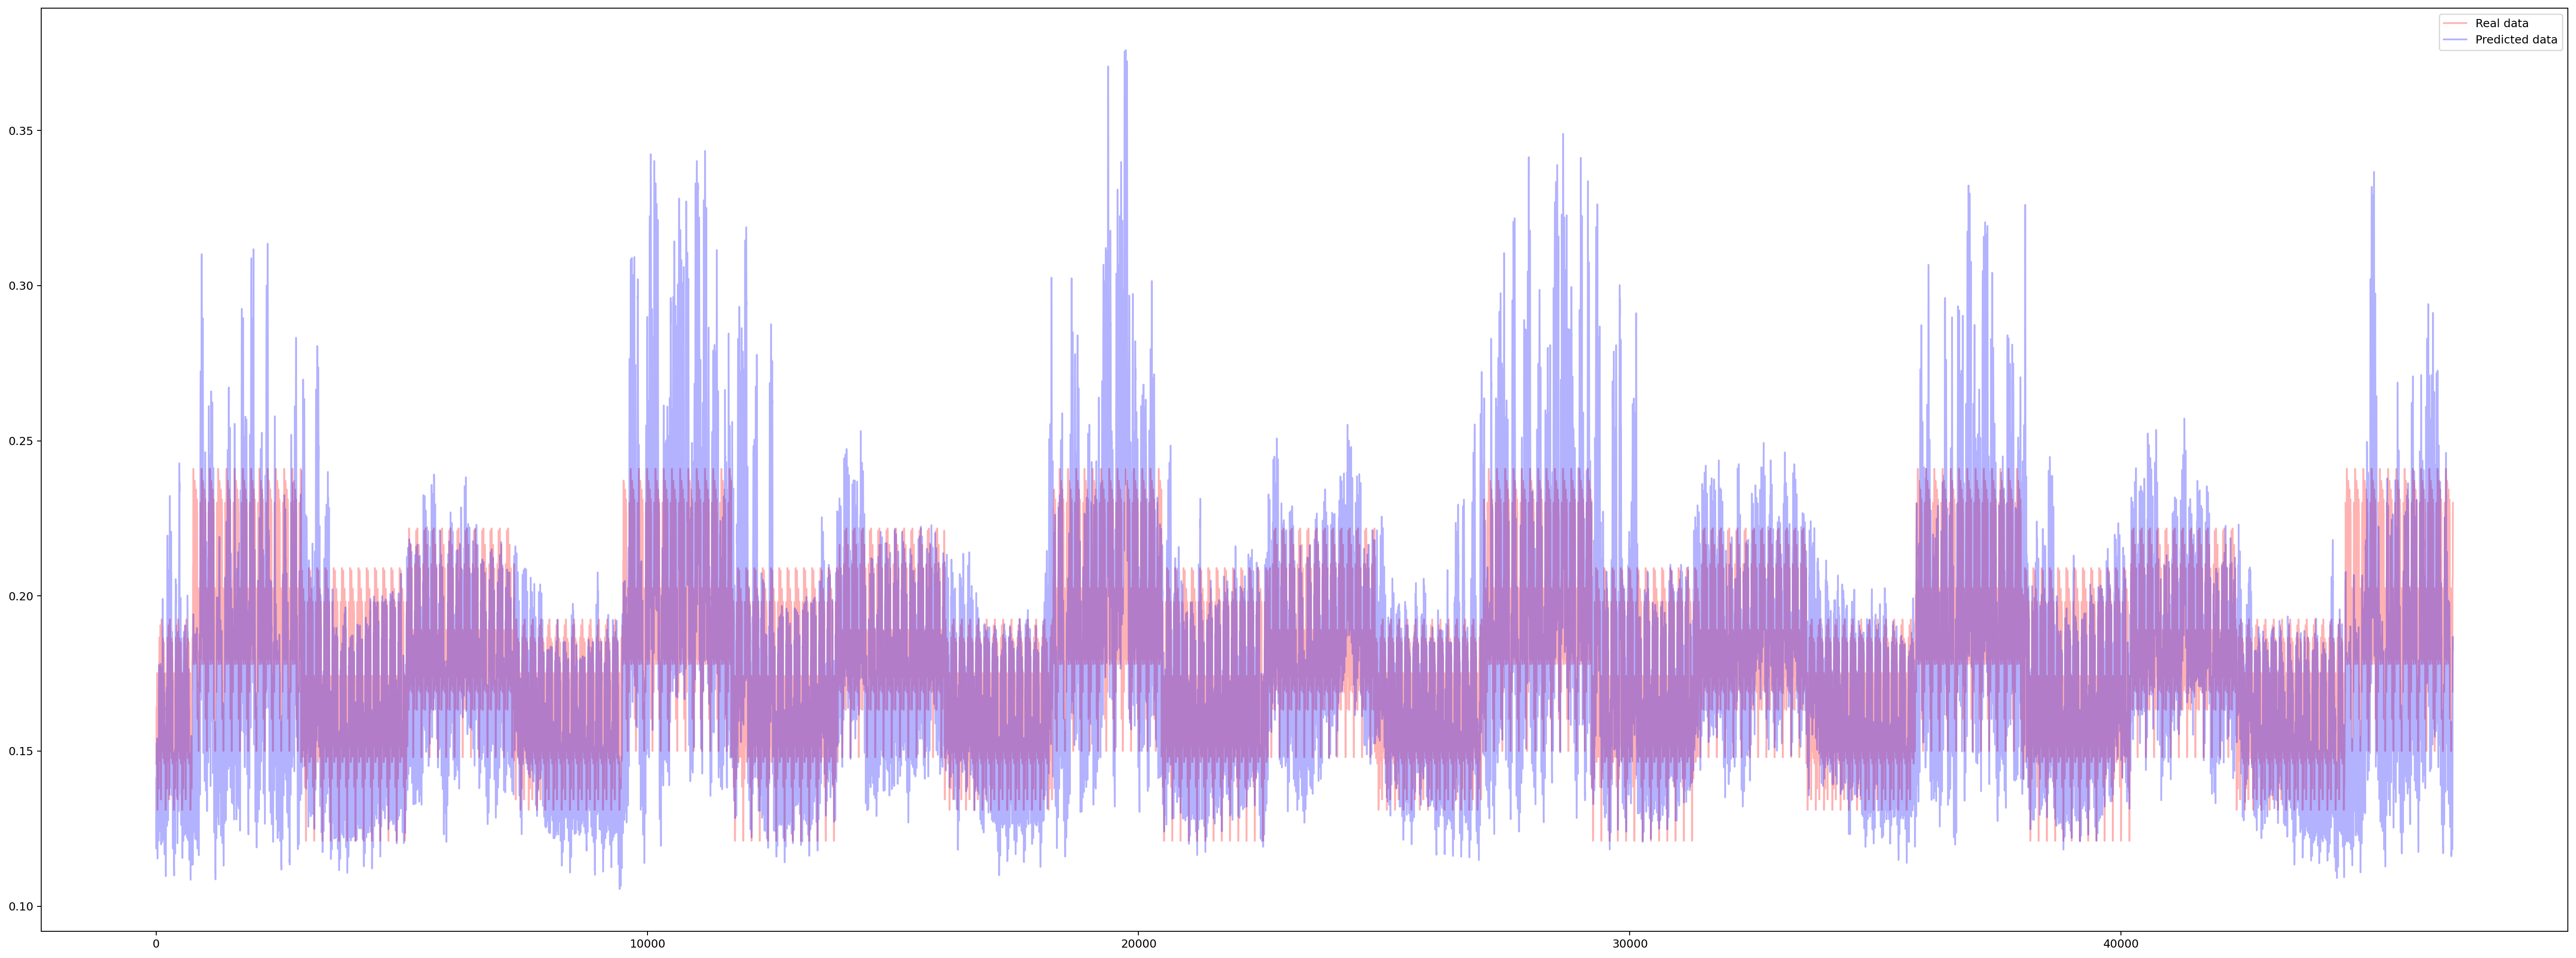

In [106]:
plt.figure(figsize=(40,15),dpi =180)
plt.plot(y_train_predict,'r',alpha = 0.3, label= 'Real data')
plt.plot(np.asarray(aep_y_train['mw_energy_consumption']),'b',alpha = 0.3,label= 'Predicted data')
plt.legend()

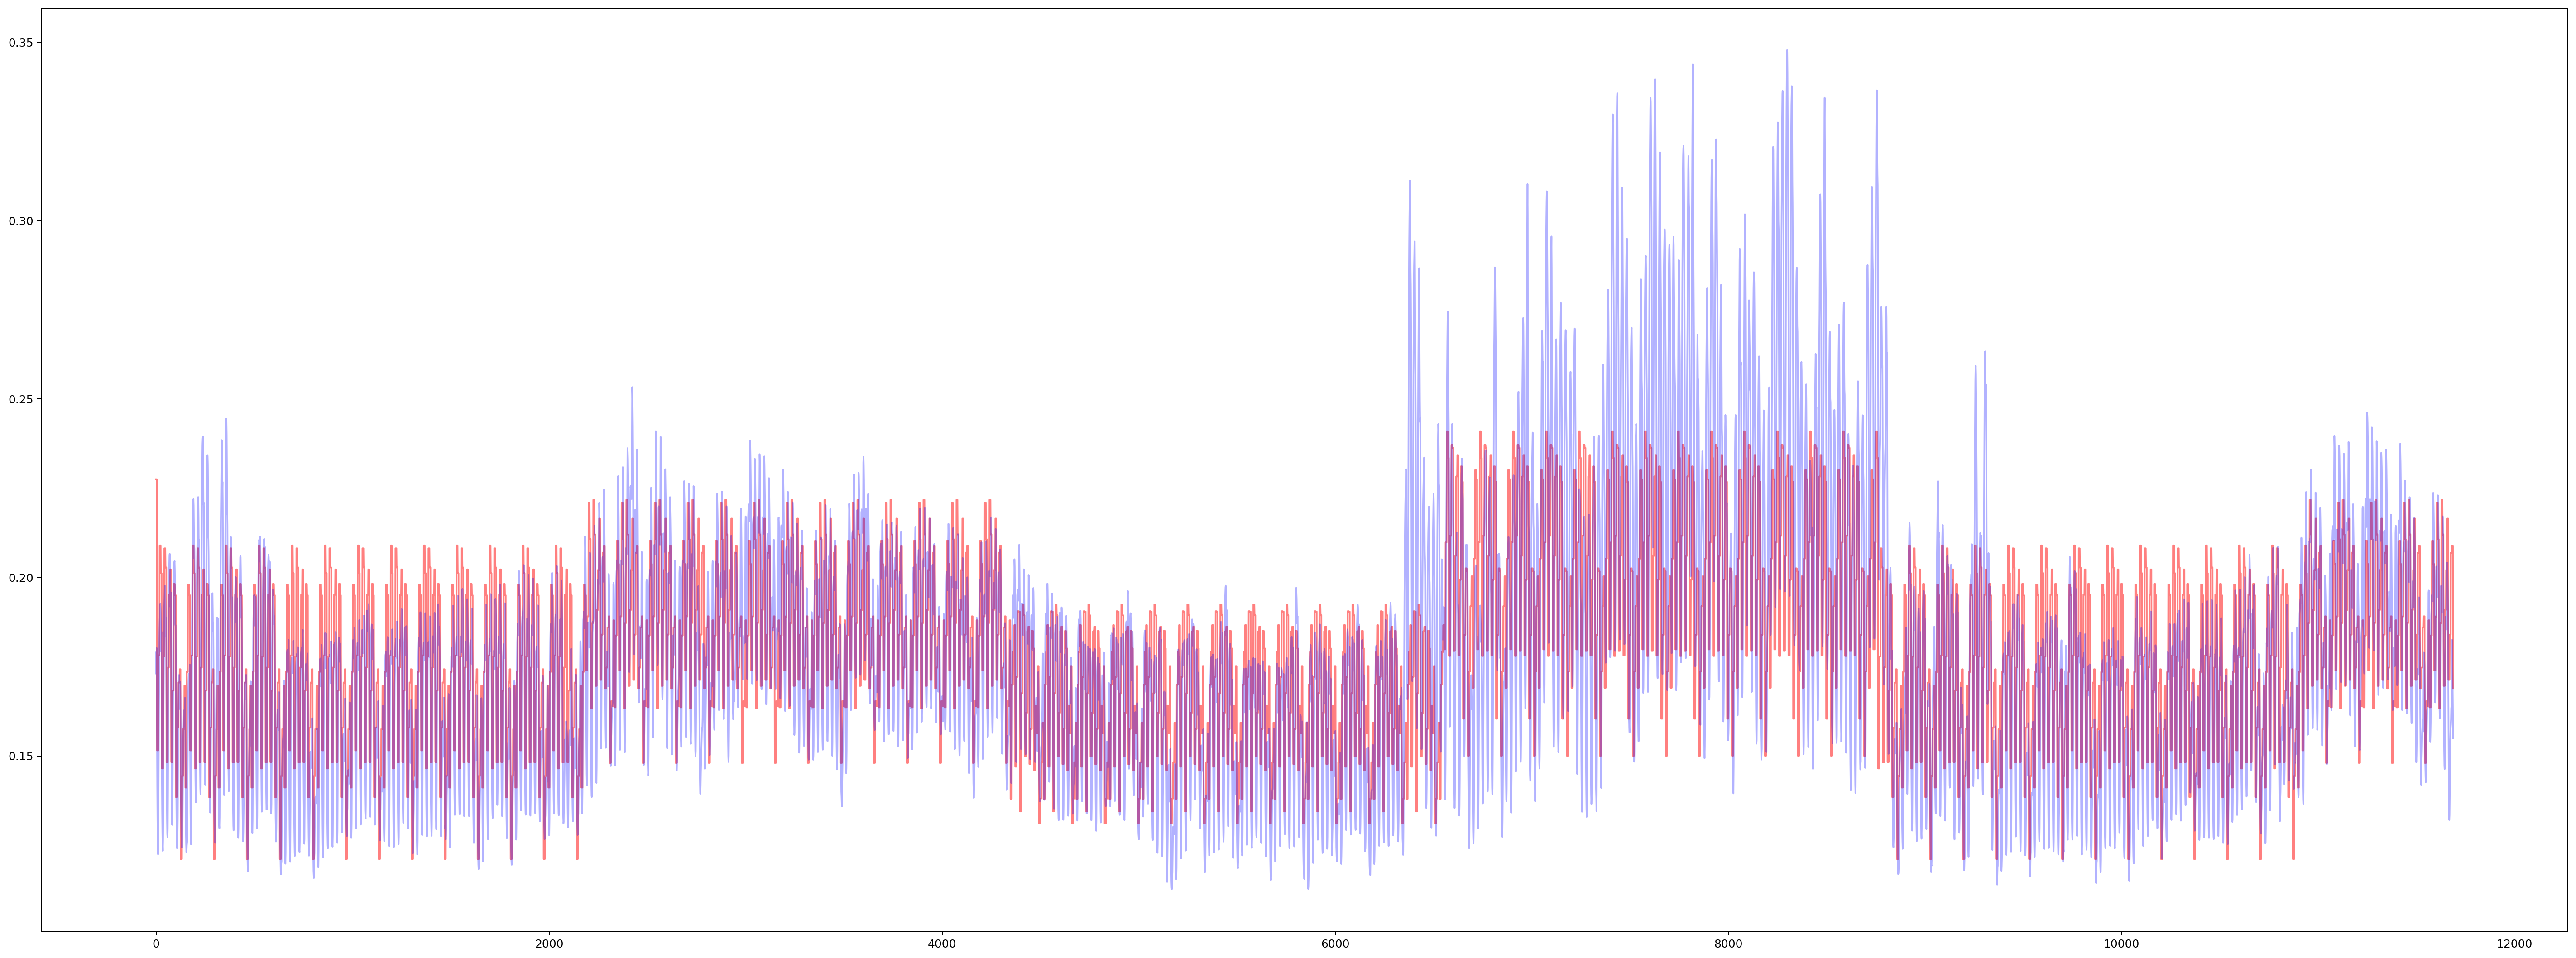

In [107]:
plt.figure(figsize=(40,15),dpi =180)
plt.plot(y_val_predict,'r',alpha = 0.5)
plt.plot(np.asarray(aep_y_test['mw_energy_consumption']),'b',alpha = 0.3)

### MACHINE LEARNING MODELLING --- Random Forest ML

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
RF_regr = RandomForestRegressor(n_estimators = 500, random_state=0).fit(aep_X_train, aep_y_train)

#n_estimators   --- The number of trees in the forest.

In [110]:
print(RF_regr.predict(aep_X_train))

[0.14082227 0.14082227 0.14082227 ... 0.25146794 0.25146794 0.25146794]


In [111]:
RF_regr.score(aep_X_train,aep_y_train)


0.5849493787310194

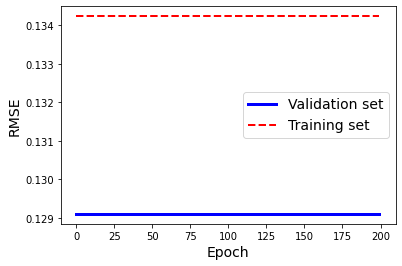

In [136]:
RF_regr = RandomForestRegressor(n_estimators = 500, random_state=0)    
                                               

n_epochs = 200
train_errors, val_errors = [], []
for n_estimators in range(n_epochs):
    RF_regr.fit(aep_X_train, aep_y_train)
    y_train_predict = RF_regr.predict(aep_X_train)
    y_val_predict = RF_regr.predict(aep_X_test)
    train_errors.append(mean_absolute_error(aep_y_train, y_train_predict))
    val_errors.append(mean_absolute_error(aep_y_test, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# plt.annotate('Best model',
#              xy=(best_epoch, best_val_rmse),
#              xytext=(best_epoch, best_val_rmse + 1),
#              ha="center",
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=16,
            # )

# best_val_rmse -= best_epoch  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")

plt.show()

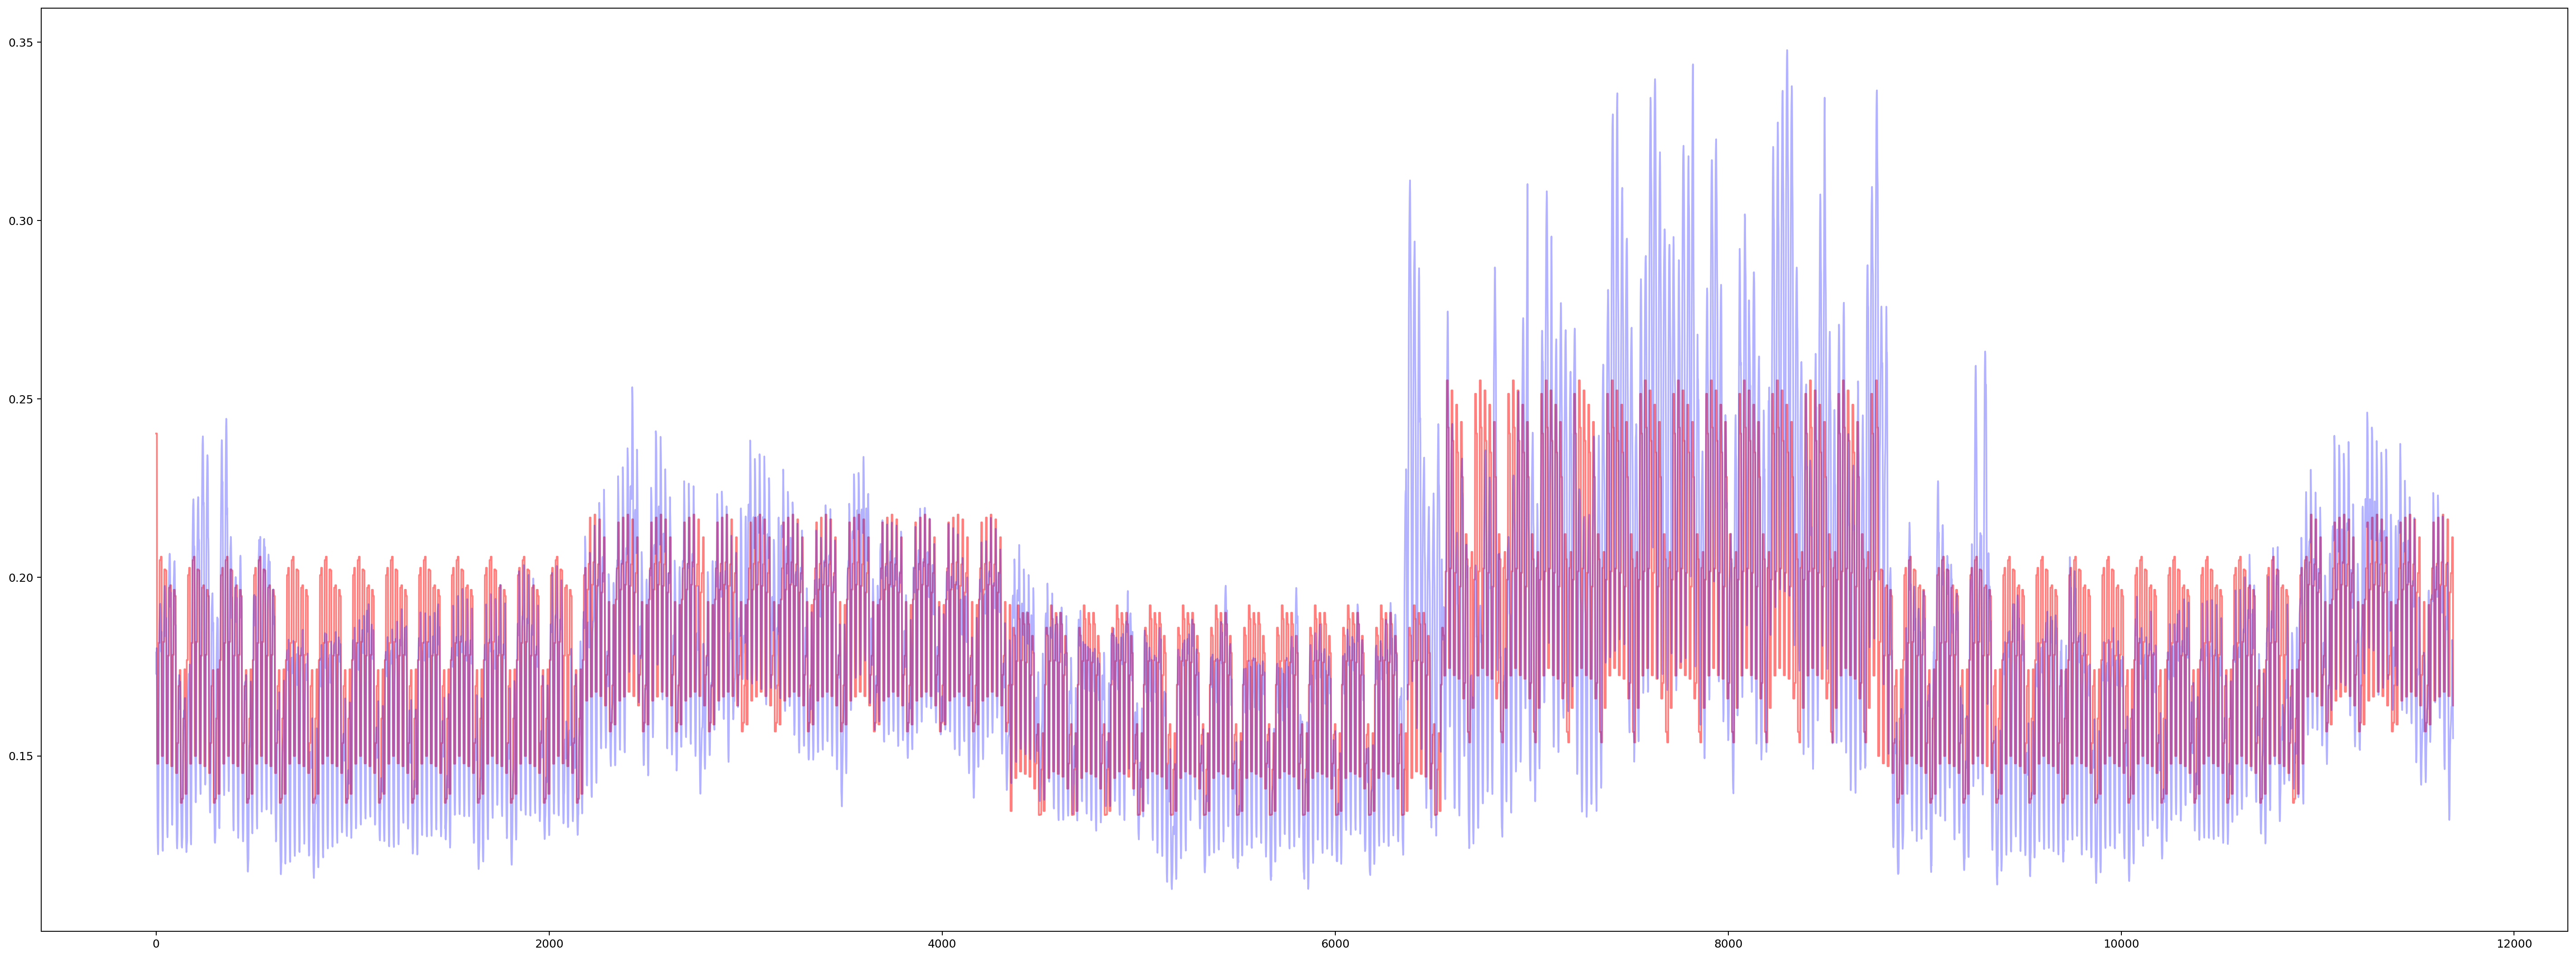

In [117]:
y_train_predict = RF_regr.predict(aep_X_train)
y_val_predict = RF_regr.predict(aep_X_test)
plt.figure(figsize=(40,15),dpi =180)
plt.plot(y_val_predict,'r',alpha = 0.5, label= 'Real data')
plt.plot(np.asarray(aep_y_test['mw_energy_consumption']),'b',alpha = 0.3,label= 'Predicted data')

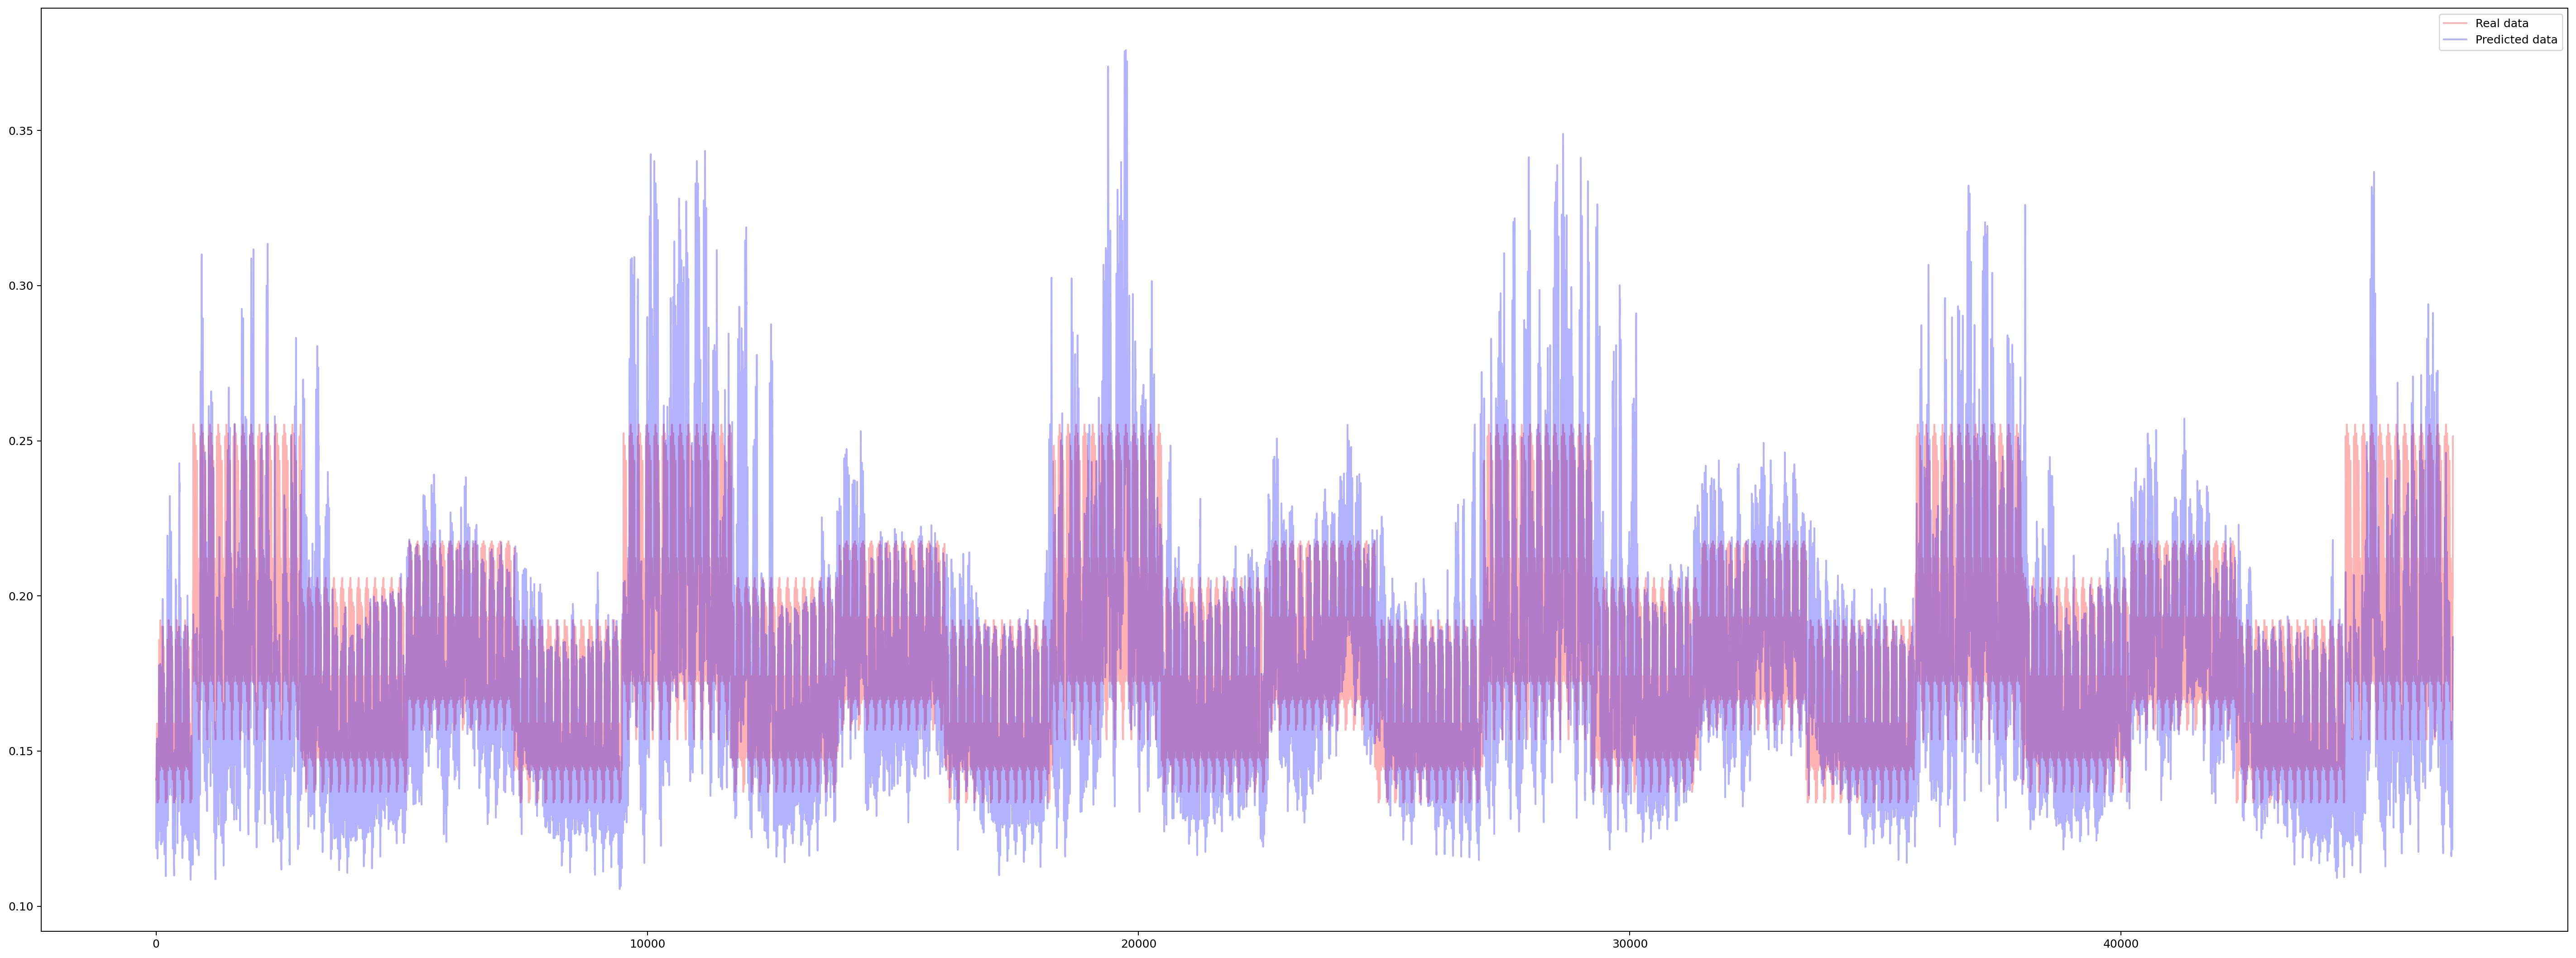

In [118]:
plt.figure(figsize=(40,15),dpi =180)
plt.plot(y_train_predict,'r',alpha = 0.3, label= 'Real data')
plt.plot(np.asarray(aep_y_train['mw_energy_consumption']),'b',alpha = 0.3,label= 'Predicted data')
plt.legend()

#### MACHINE LEARNING MODELLING --- SGDRegressor ML

Linear model fitted by minimizing a regularized empirical loss with SGD.

(SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule)

In [103]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [115]:
SGDLreg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)).fit(aep_X_train, aep_y_train)

In [132]:
SGDLreg.score(aep_X_train,aep_y_train)

0.524996238929158

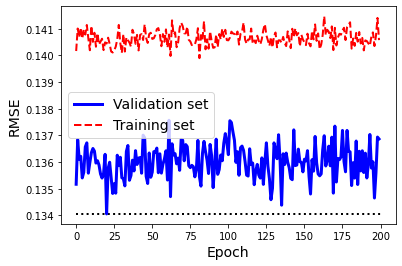

In [135]:
SGDLreg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))  
                                               

n_epochs = 200
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    SGDLreg.fit(aep_X_train, aep_y_train)
    y_train_predict = SGDLreg.predict(aep_X_train)
    y_val_predict = SGDLreg.predict(aep_X_test)
    train_errors.append(mean_absolute_error(aep_y_train, y_train_predict))
    val_errors.append(mean_absolute_error(aep_y_test, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# plt.annotate('Best model',
#              xy=(best_epoch, best_val_rmse),
#              xytext=(best_epoch, best_val_rmse + 1),
#              ha="center",
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=16,
            # )

# best_val_rmse -= best_epoch  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")

plt.show()

In [119]:
y_train_predict = SGDLreg.predict(aep_X_train)
y_val_predict = SGDLreg.predict(aep_X_test)


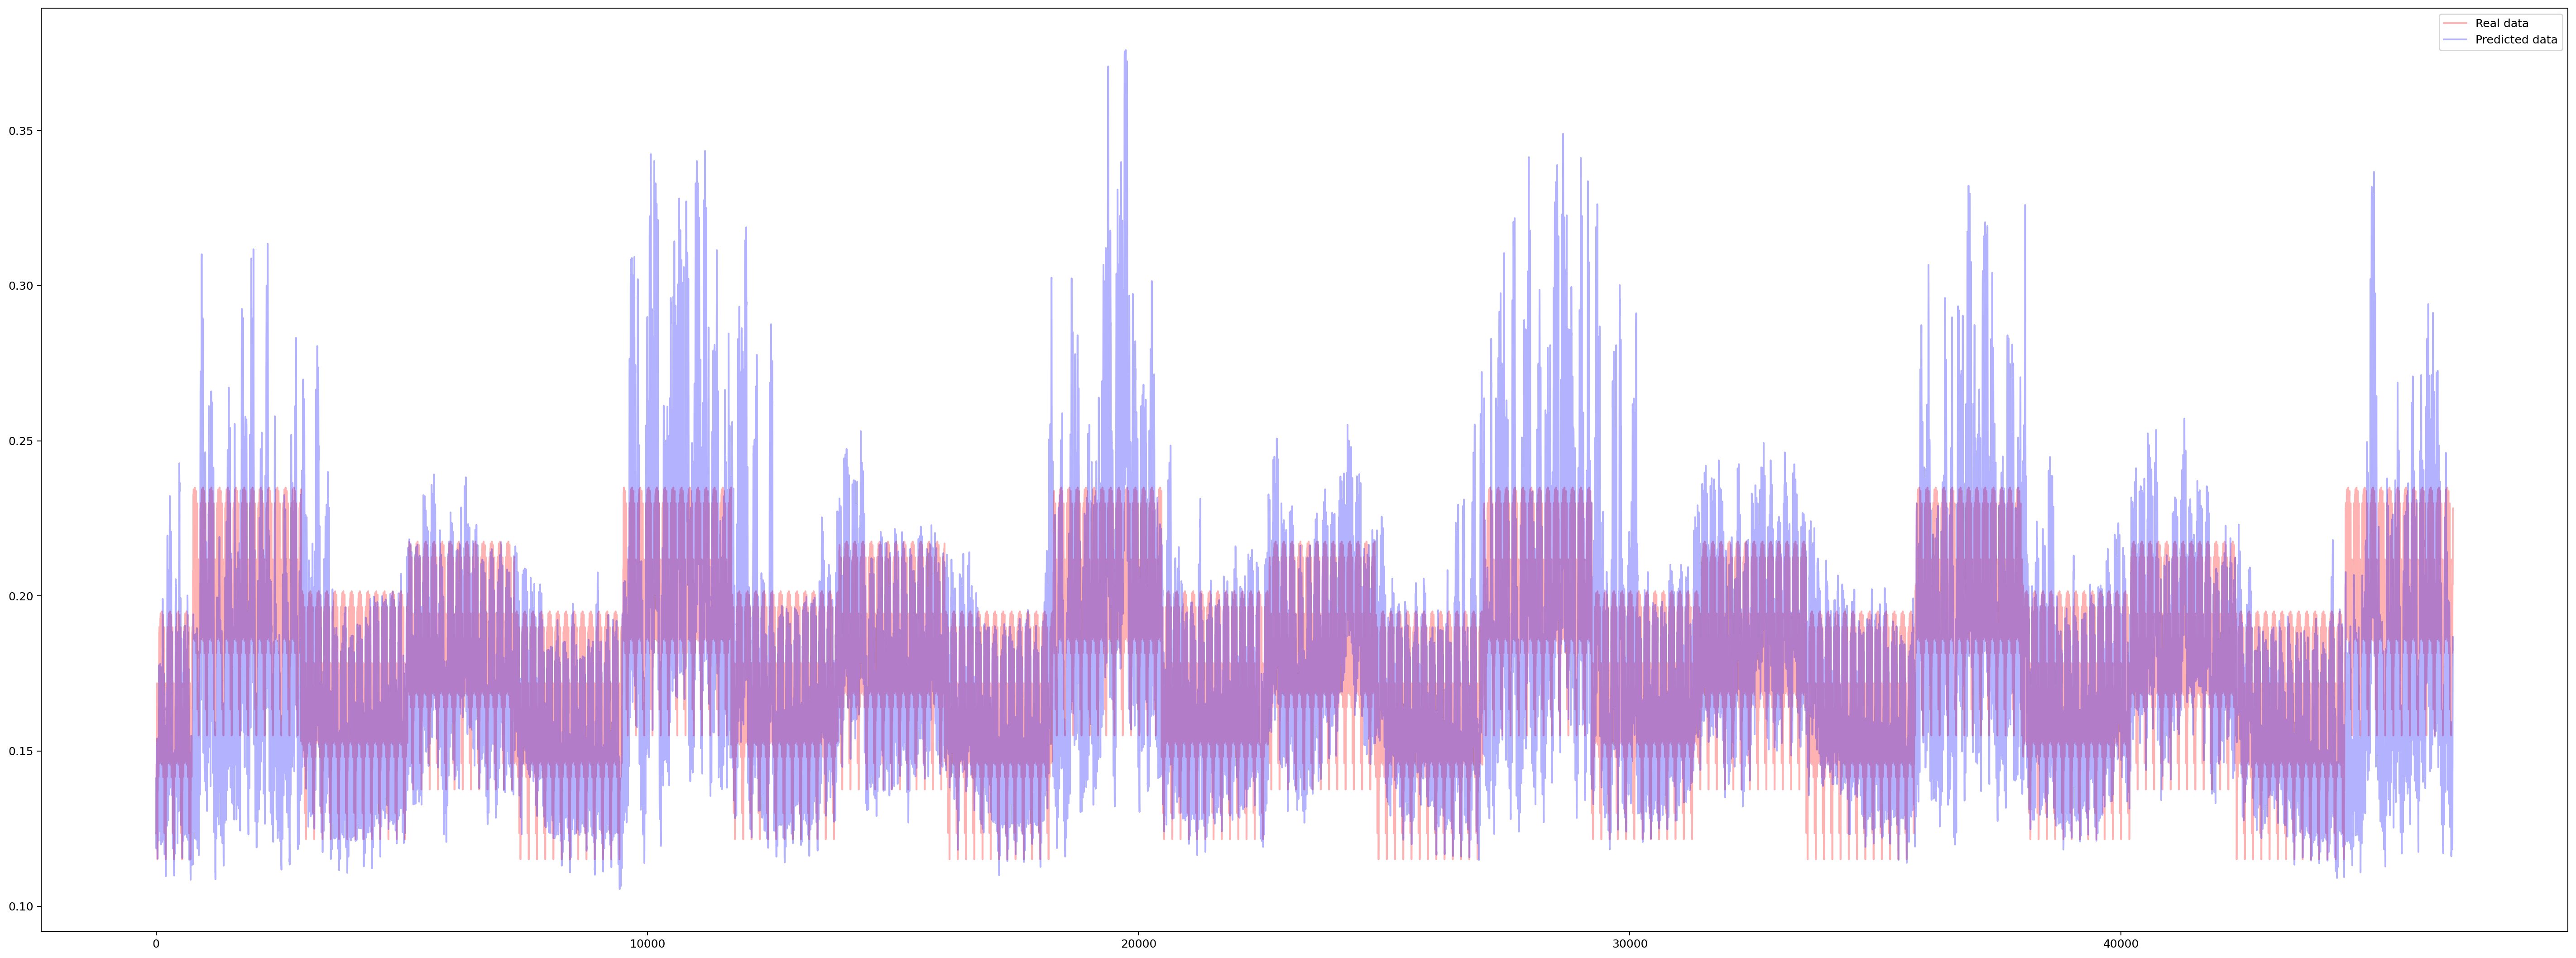

In [120]:
plt.figure(figsize=(40,15),dpi =180)
plt.plot(y_train_predict,'r',alpha = 0.3, label= 'Real data')
plt.plot(np.asarray(aep_y_train['mw_energy_consumption']),'b',alpha = 0.3,label= 'Predicted data')
plt.legend()

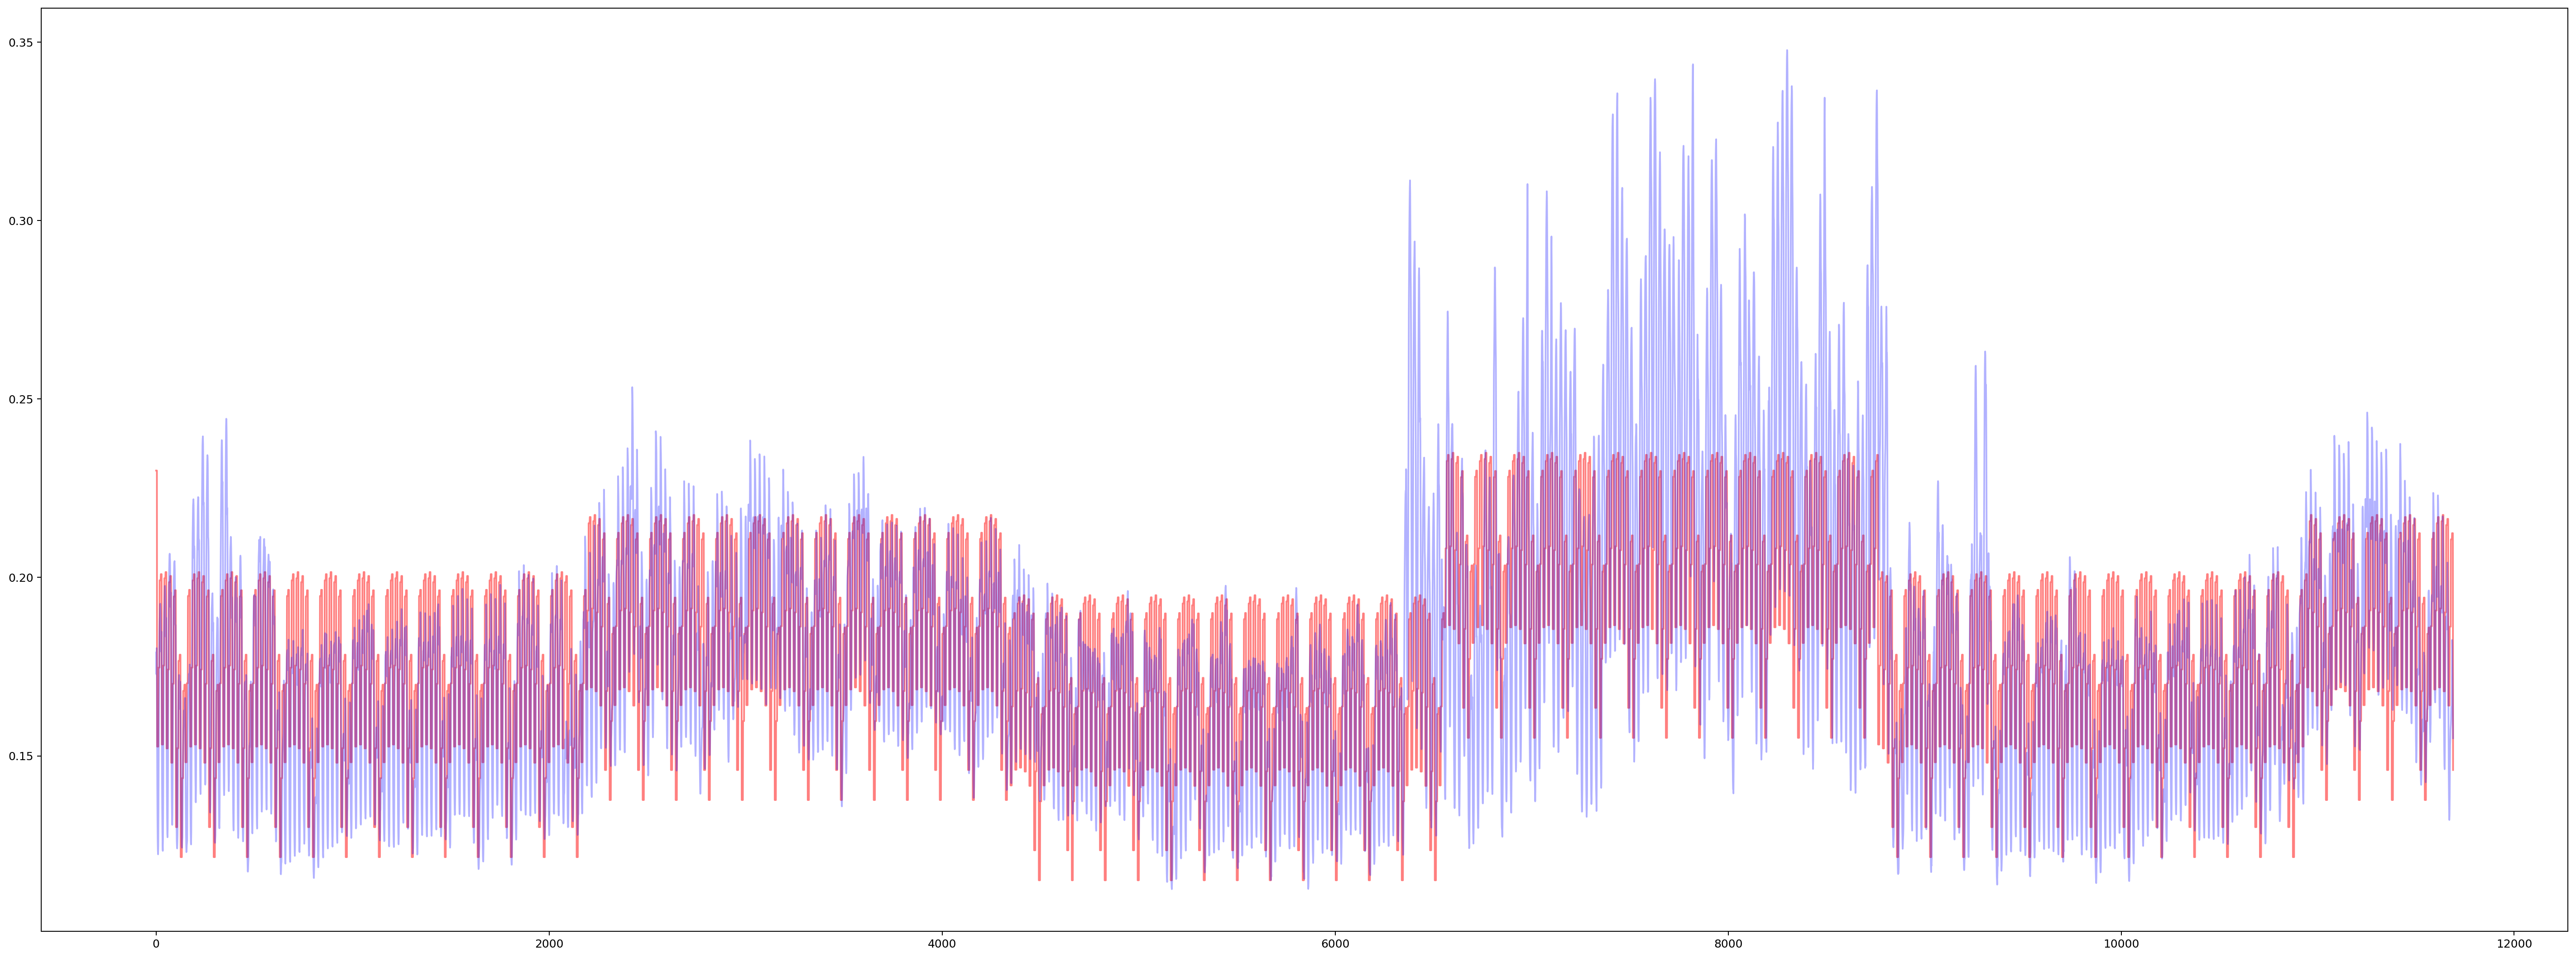

In [121]:
plt.figure(figsize=(40,15),dpi =180)
plt.plot(y_val_predict,'r',alpha = 0.5)
plt.plot(np.asarray(aep_y_test['mw_energy_consumption']),'b',alpha = 0.3)

In [80]:
from statsmodels.tsa.arima_model import ARIMA